# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data Preprocessing

In [4]:
df=pd.read_csv(r'C:\Users\yashw\Downloads\Bankruptcy Prediction (1).csv')

In [5]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [6]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [7]:
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

# This feature has just one unique value and it wont be of any importance.

In [9]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
df.shape

(6819, 96)

In [12]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [13]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

[0 rows x 96 columns]

In [14]:
null_values_sum = df.isna().sum()

print(null_values_sum)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


# Check for duplicates


In [16]:
df.duplicated().unique()

array([False])

# Checking the Value Count of Output Variable

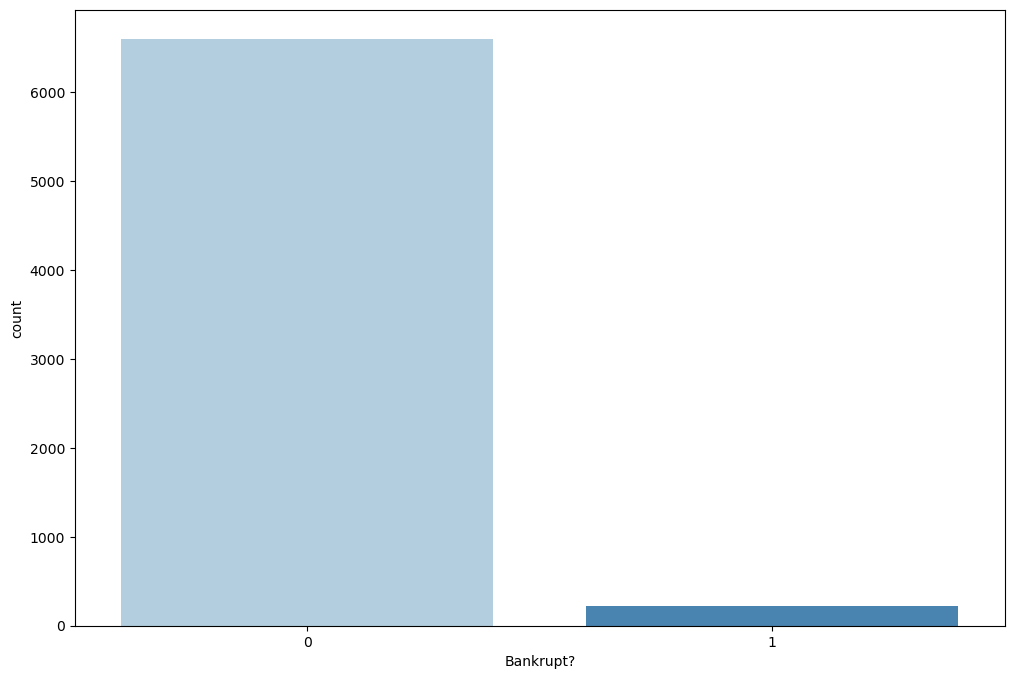

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Bankrupt?',data = df,palette ='Blues' )
plt.show()

In [19]:
target= df[['Bankrupt?']]

In [20]:
features= df.drop('Bankrupt?', axis=1)
features

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818    

# Outlier Detection and Handling

In [22]:
#For finding number of outliers in each column
def outlier_numbers(df, colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3 - q1

    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)

    return len(df[(df[colname] > upper_extreme) | (df[colname] < lower_extreme)])

for colname in df.columns:
    print(colname, ":", outlier_numbers(df, colname))

Bankrupt? : 220
 ROA(C) before interest and depreciation before interest : 391
 ROA(A) before interest and % after tax : 561
 ROA(B) before interest and depreciation after tax : 432
 Operating Gross Margin : 320
 Realized Sales Gross Margin : 318
 Operating Profit Rate : 716
 Pre-tax net Interest Rate : 773
 After-tax net Interest Rate : 867
 Non-industry income and expenditure/revenue : 1094
 Continuous interest rate (after tax) : 806
 Operating Expense Rate : 0
 Research and development expense rate : 182
 Cash flow rate : 576
 Interest-bearing debt interest rate : 396
 Tax rate (A) : 120
 Net Value Per Share (B) : 457
 Net Value Per Share (A) : 464
 Net Value Per Share (C) : 465
 Persistent EPS in the Last Four Seasons : 508
 Cash Flow Per Share : 532
 Revenue Per Share (Yuan ¥) : 478
 Operating Profit Per Share (Yuan ¥) : 442
 Per Share Net profit before tax (Yuan ¥) : 511
 Realized Sales Gross Profit Growth Rate : 814
 Operating Profit Growth Rate : 1008
 After-tax Net Profit Grow

In [23]:
def outlier_deletion(df, exclude_column='Bankrupt?'):
    for colname in df.columns:
        if colname == exclude_column:
            continue
        q1 = df[colname].quantile(0.25)
        q3 = df[colname].quantile(0.75)
        iqr = q3 - q1

        upper_extreme = q3 + (1.5 * iqr)
        lower_extreme = q1 - (1.5 * iqr)

        df.loc[df[colname] > upper_extreme, colname] = upper_extreme
        df.loc[df[colname] < lower_extreme, colname] = lower_extreme

# Example usage
outlier_deletion(df)

 Dividing into Categorical and Numerical variables

In [25]:
#Dividing into Categorical and Numerical variables (added just for sake of practice)
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rat

Boxplot

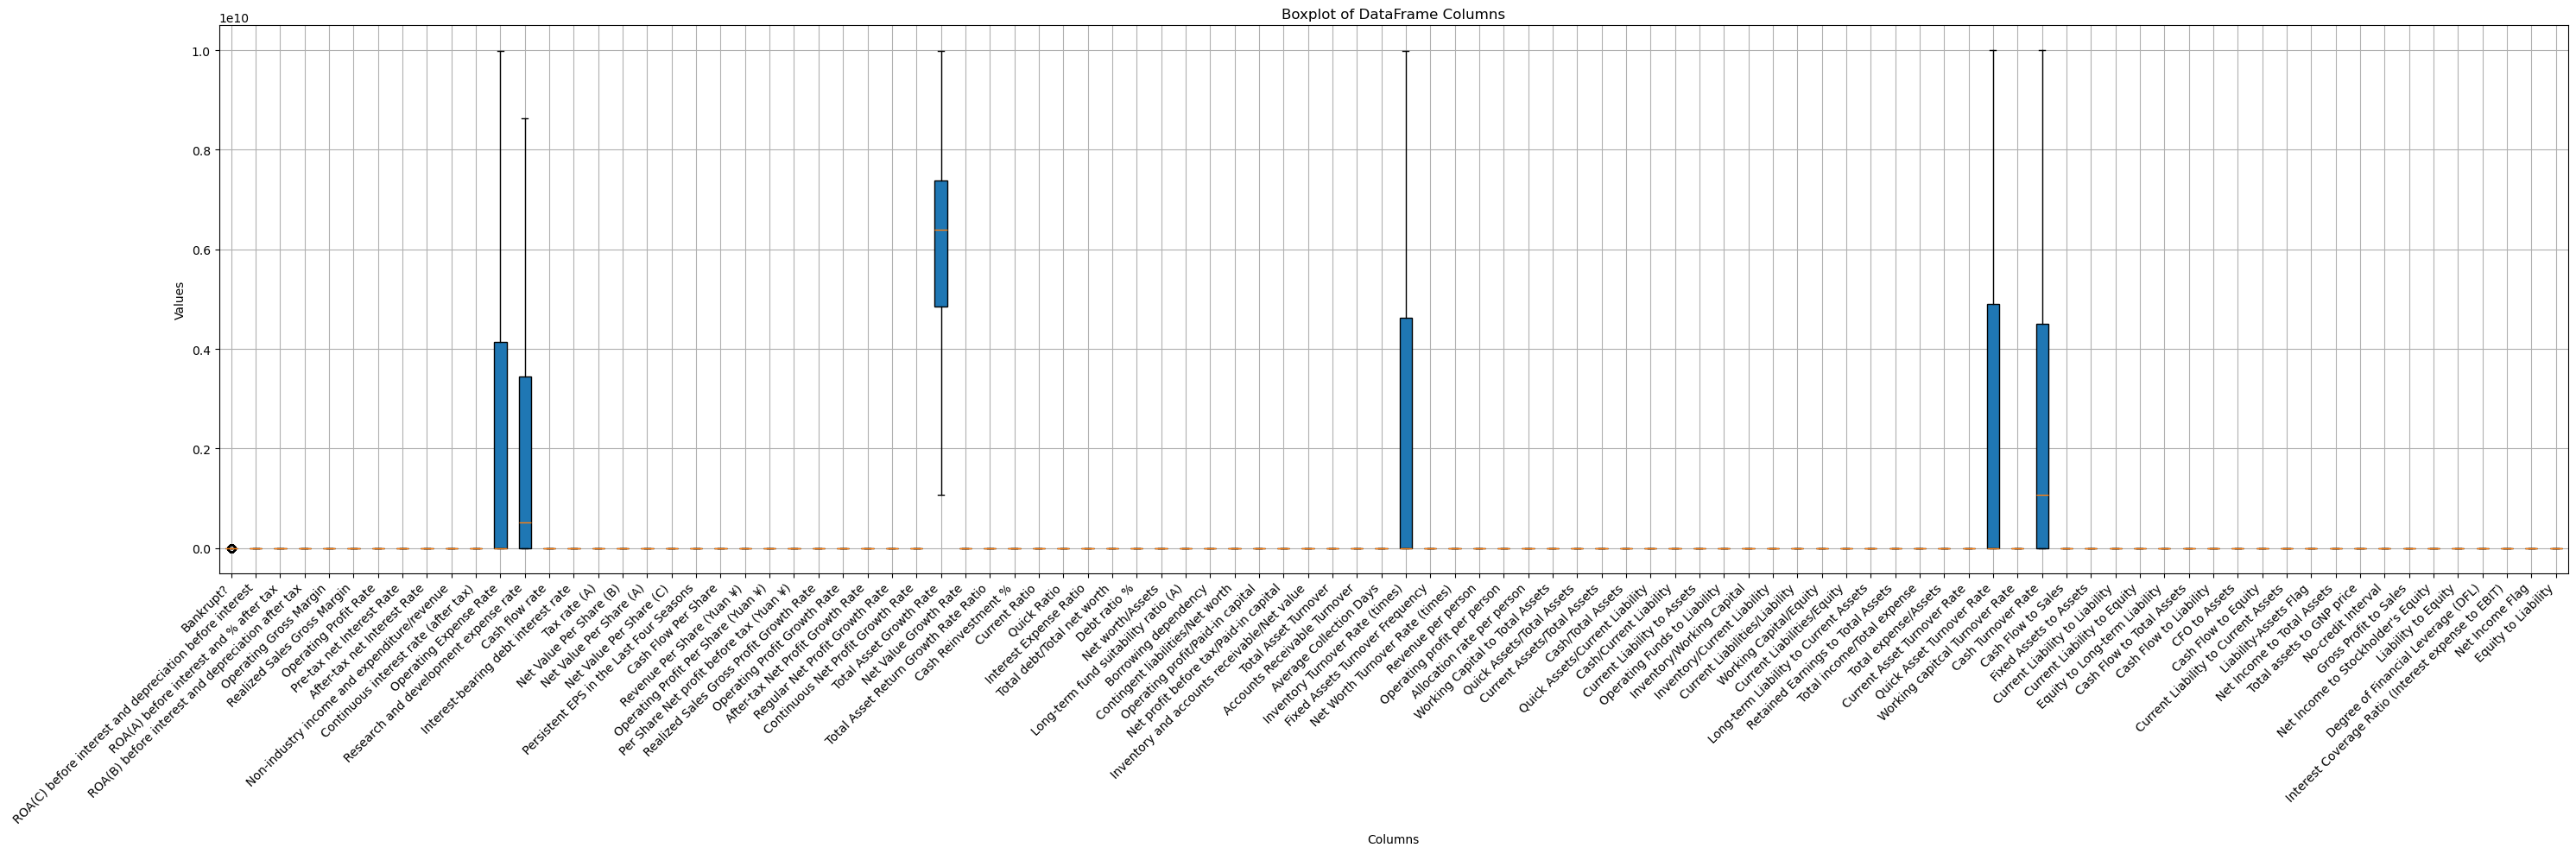

In [27]:
import matplotlib.pyplot as plt

def plot_boxplot(df, exclude_column='Bankruptcy?', figsize=(30, 10)):
    # Select columns except the exclude_column
    columns = [col for col in df.columns if col != exclude_column]

    # Create the boxplot
    plt.figure(figsize=figsize)
    plt.boxplot(df[columns].values, labels=columns, patch_artist=True)

    # Customize the boxplot
    plt.title('Boxplot of DataFrame Columns')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_boxplot(df)

Bankrupt?
Skew : 5.3


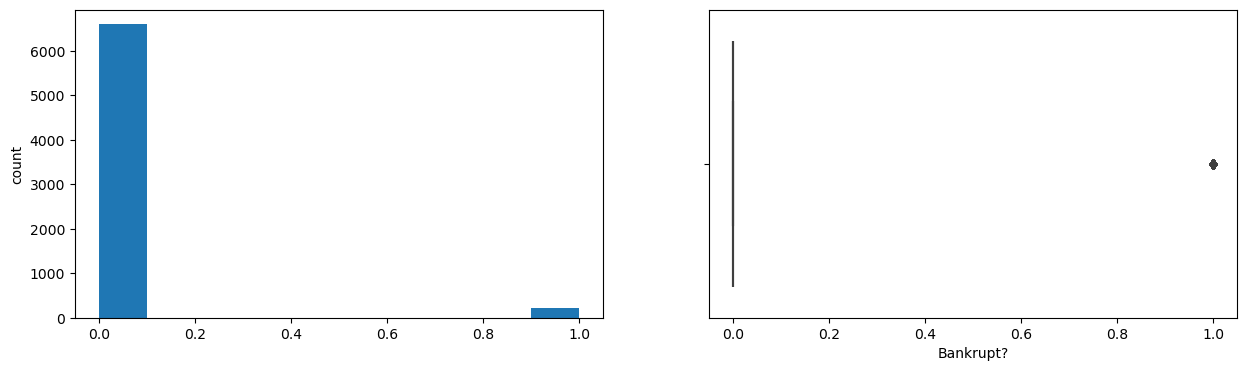

 ROA(C) before interest and depreciation before interest
Skew : 0.08


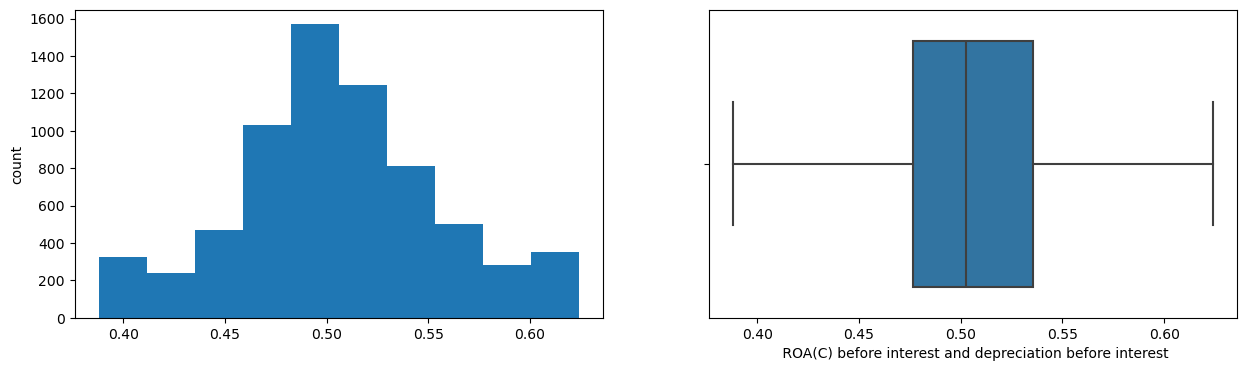

 ROA(A) before interest and % after tax
Skew : -0.03


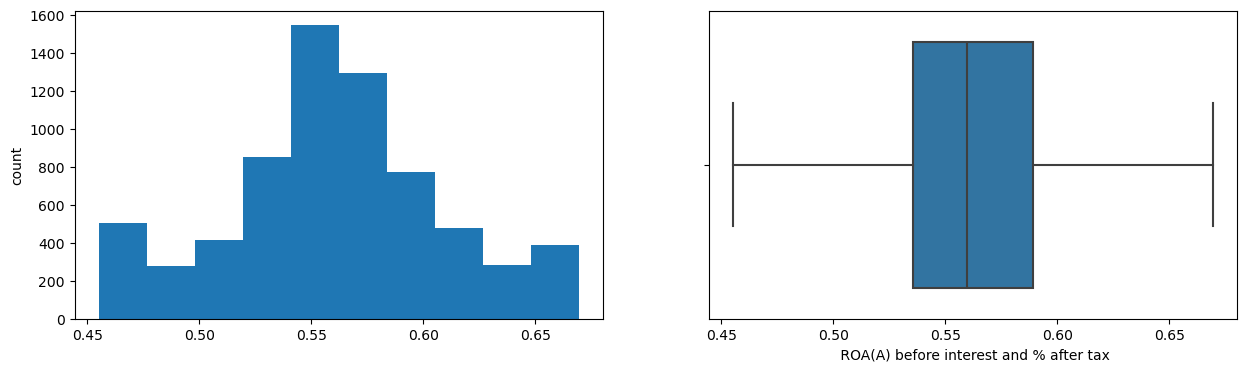

 ROA(B) before interest and depreciation after tax
Skew : 0.03


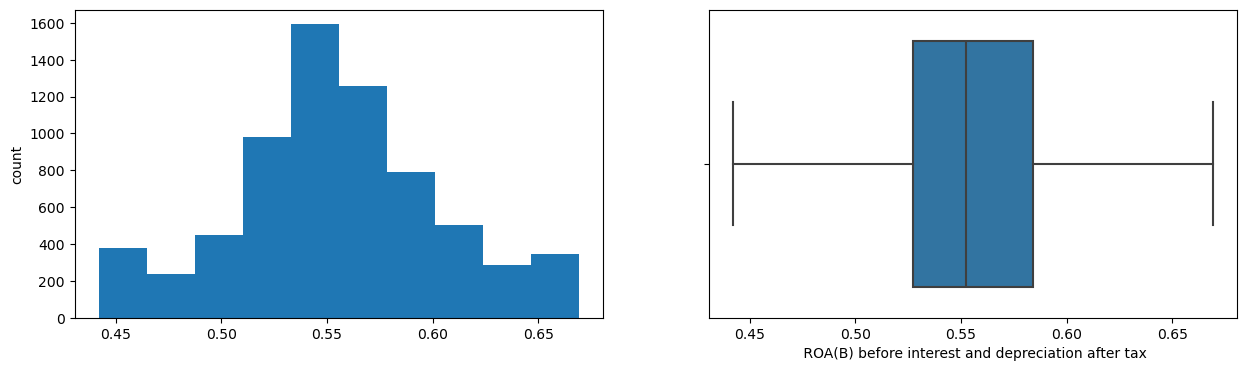

 Operating Gross Margin
Skew : 0.54


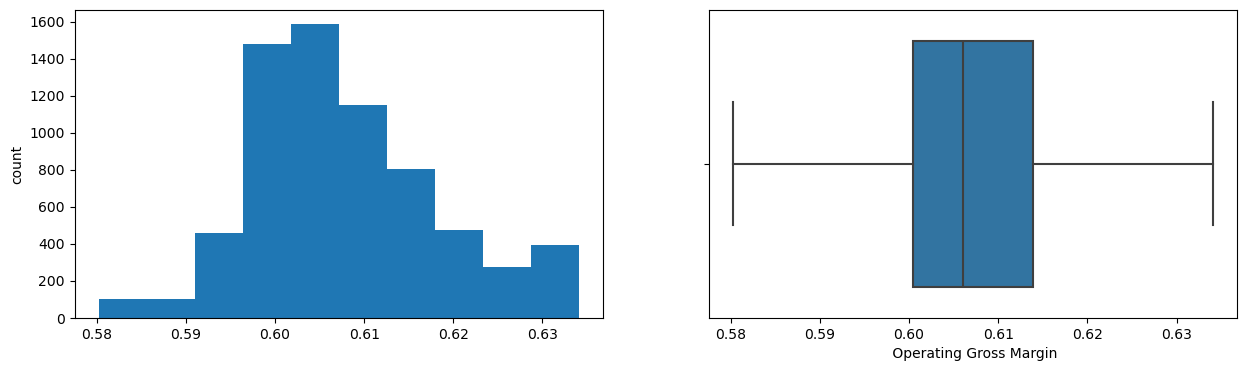

 Realized Sales Gross Margin
Skew : 0.54


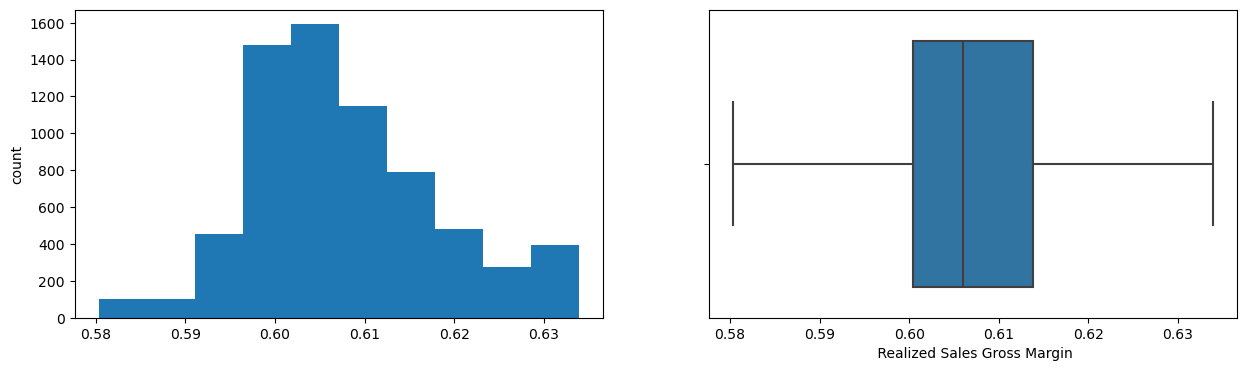

 Operating Profit Rate
Skew : 0.01


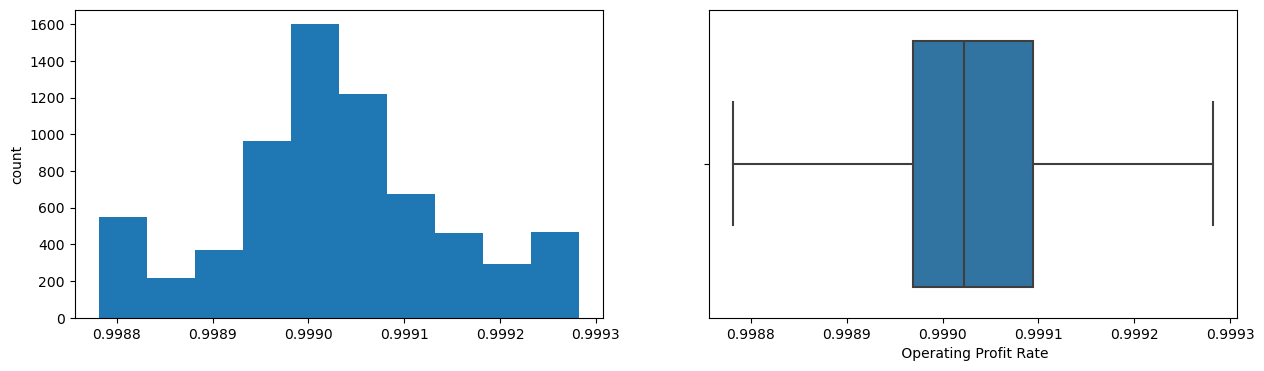

 Pre-tax net Interest Rate
Skew : -0.08


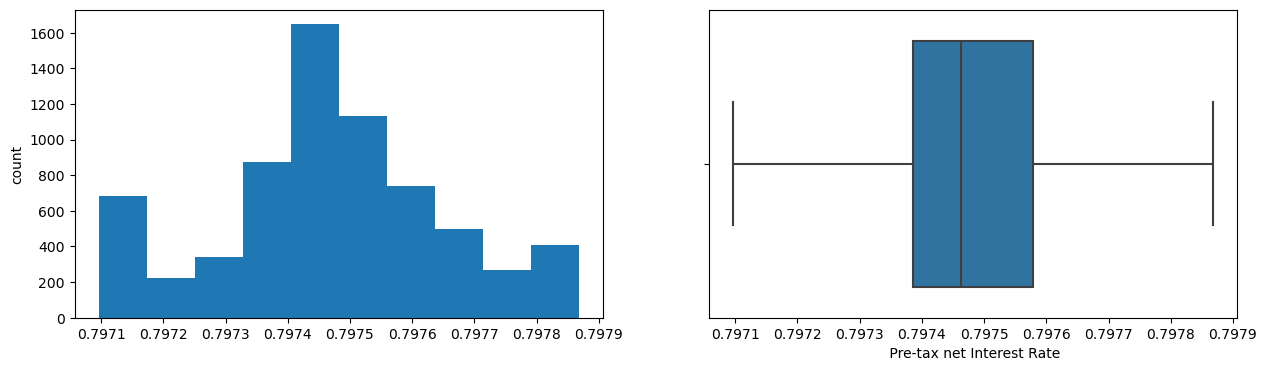

 After-tax net Interest Rate
Skew : -0.09


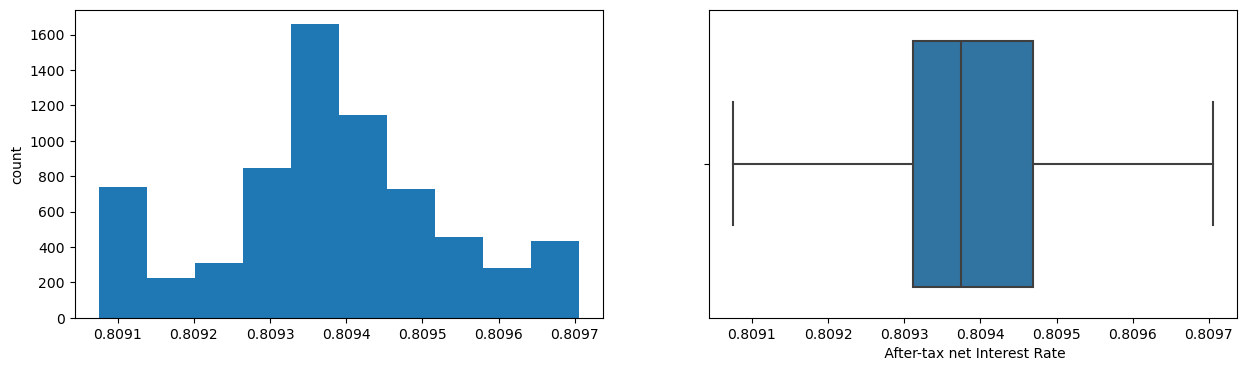

 Non-industry income and expenditure/revenue
Skew : 0.01


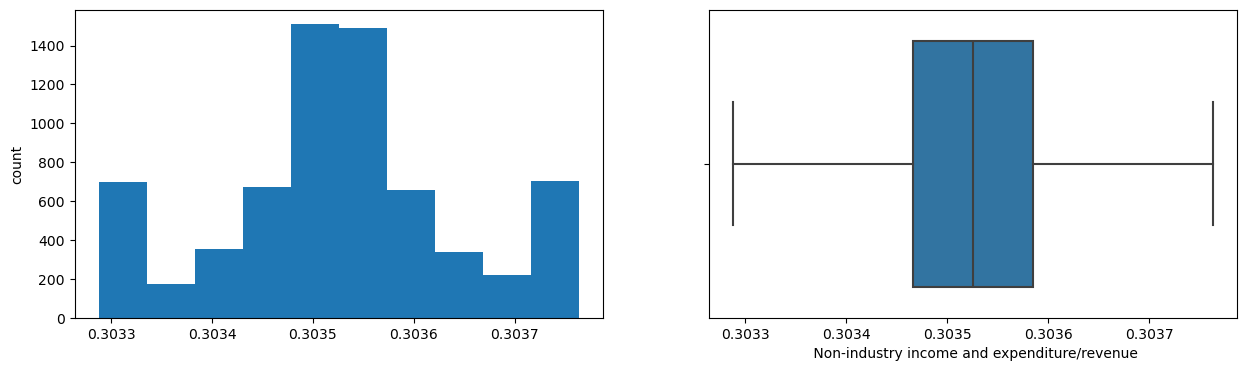

 Continuous interest rate (after tax)
Skew : -0.08


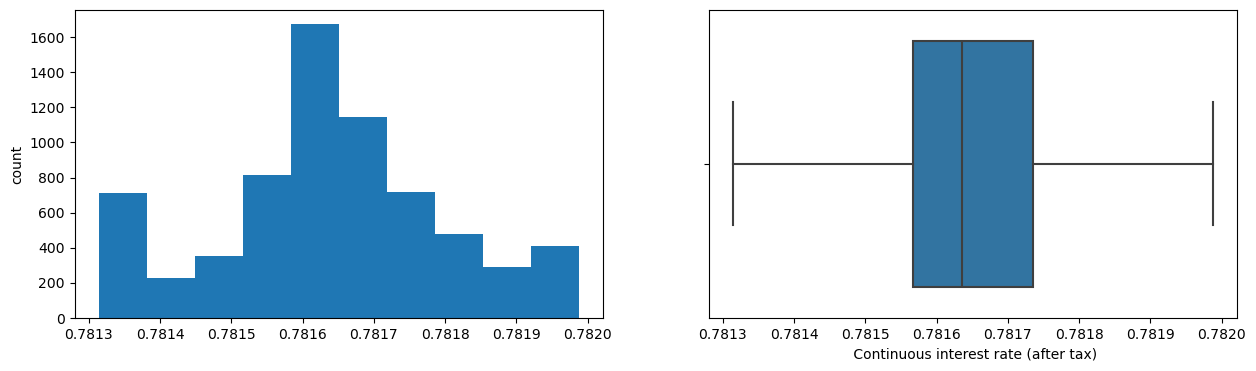

 Operating Expense Rate
Skew : 1.25


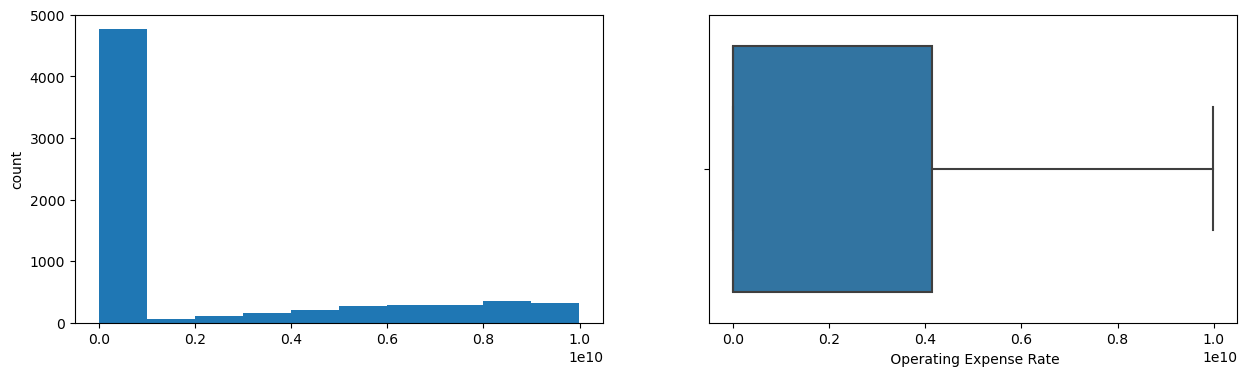

 Research and development expense rate
Skew : 1.21


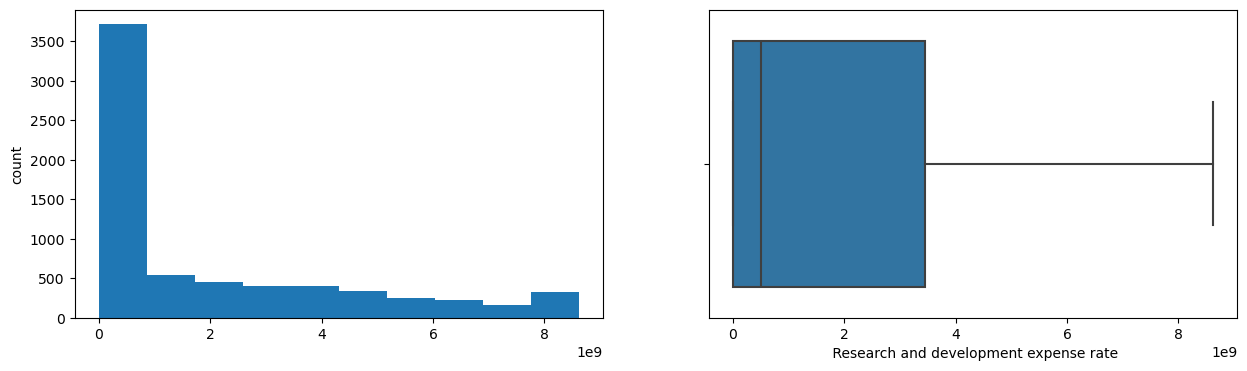

 Cash flow rate
Skew : 0.46


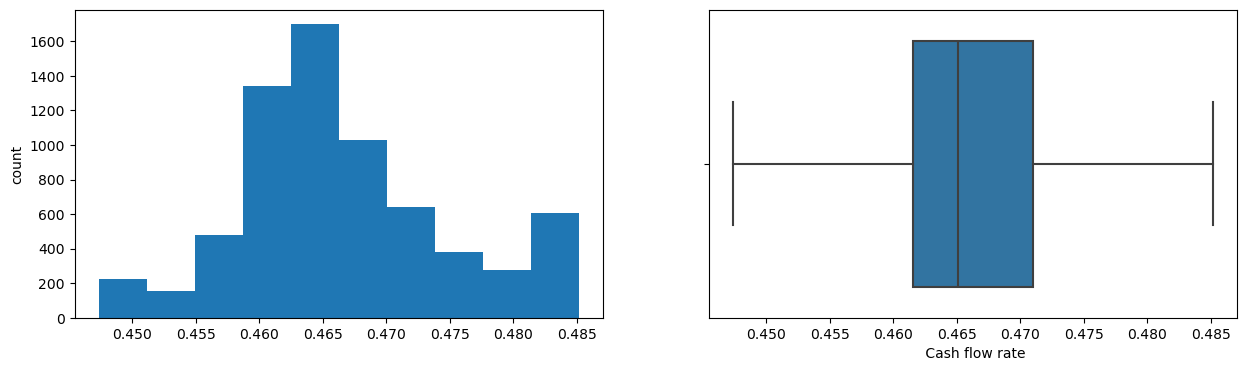

 Interest-bearing debt interest rate
Skew : 0.76


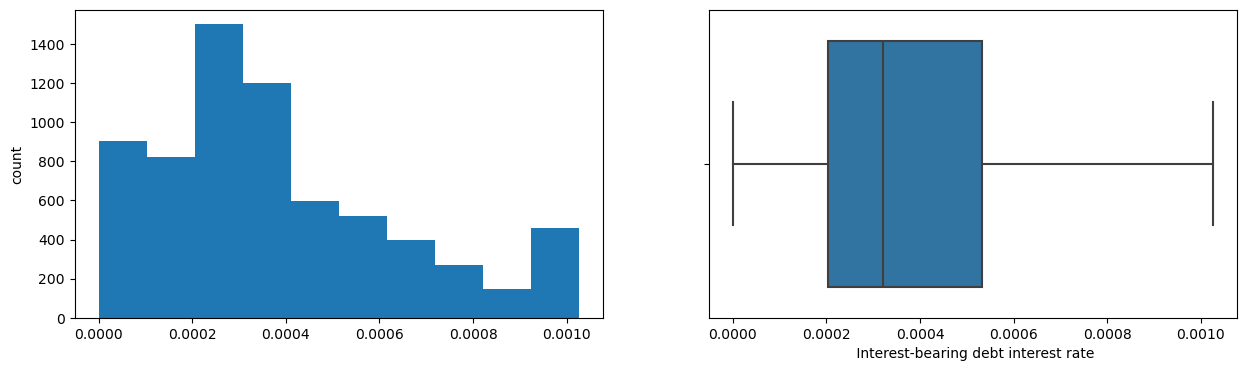

 Tax rate (A)
Skew : 1.01


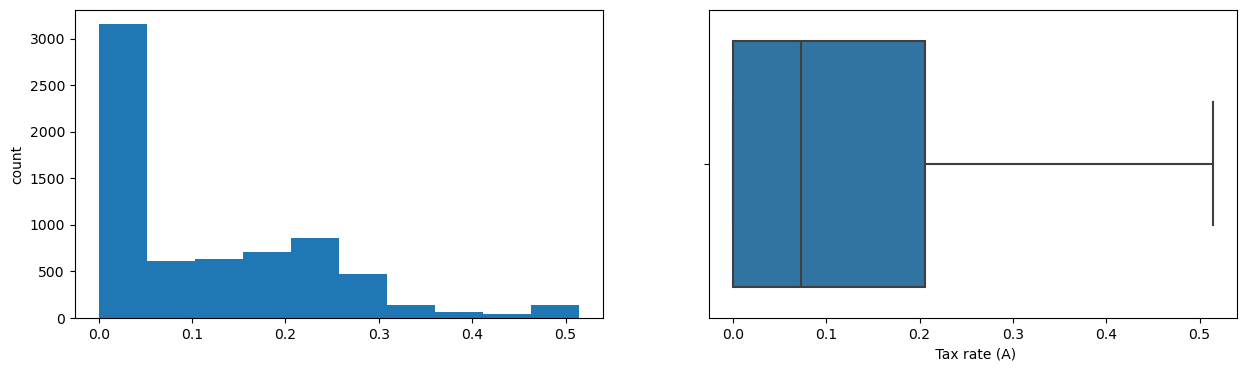

 Net Value Per Share (B)
Skew : 0.55


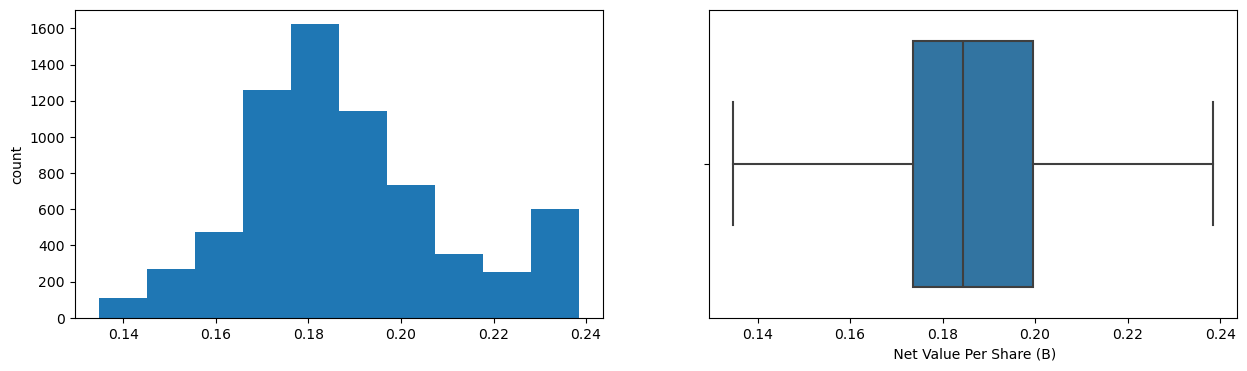

 Net Value Per Share (A)
Skew : 0.54


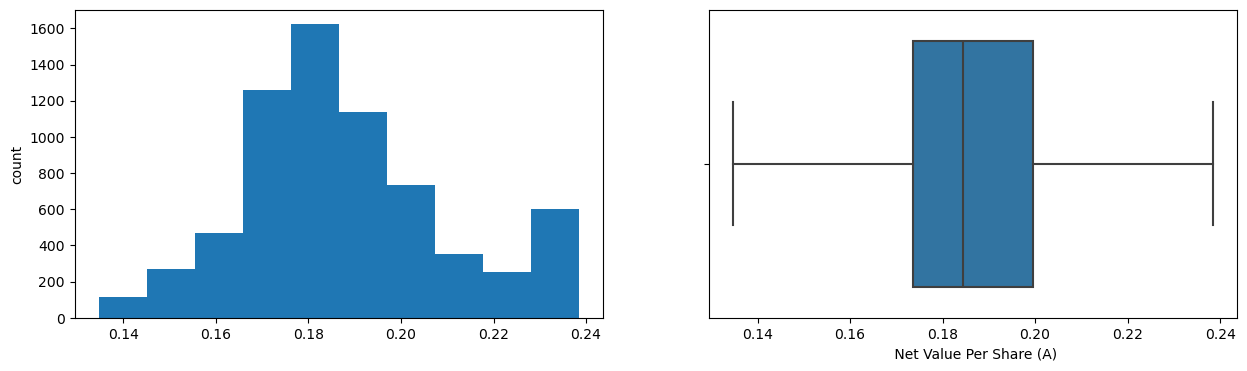

 Net Value Per Share (C)
Skew : 0.54


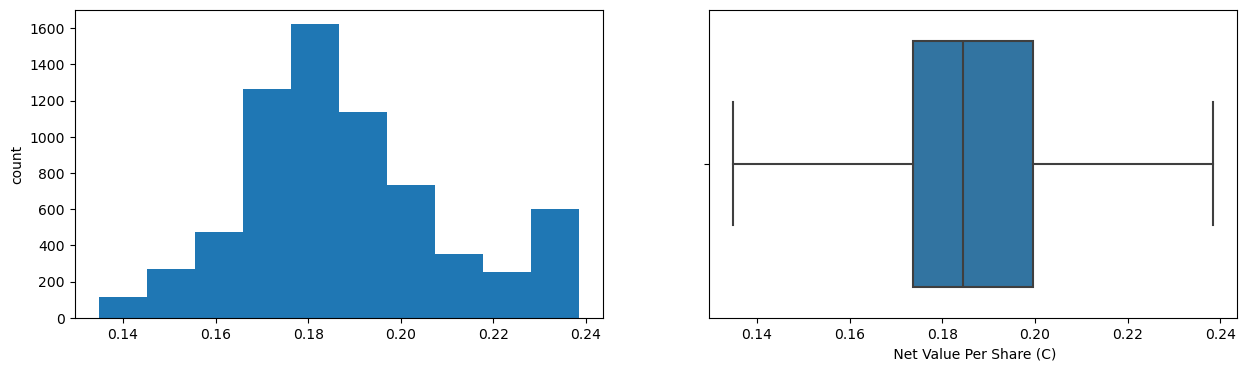

 Persistent EPS in the Last Four Seasons
Skew : 0.33


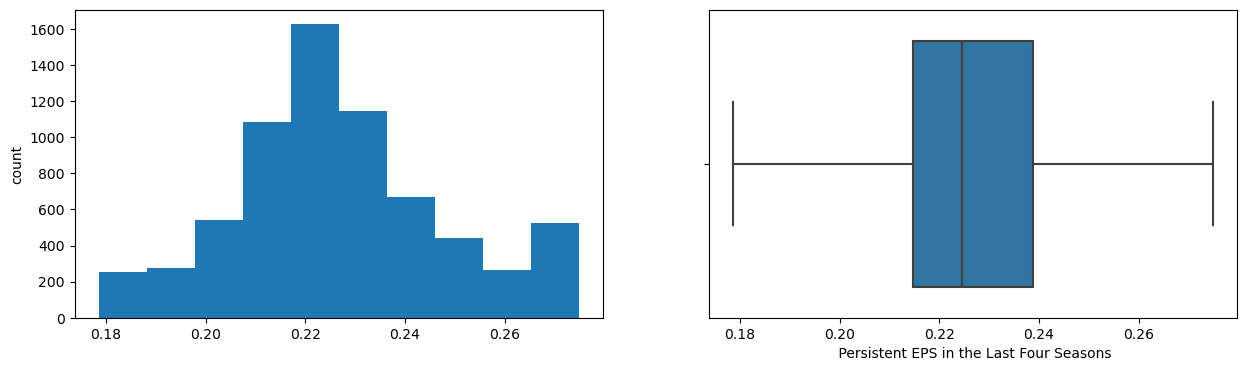

 Cash Flow Per Share
Skew : 0.16


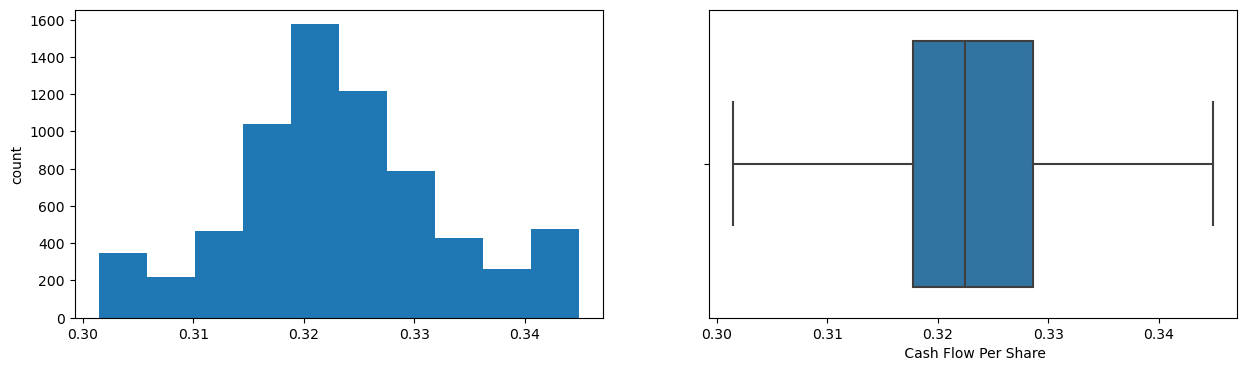

 Revenue Per Share (Yuan ¥)
Skew : 1.02


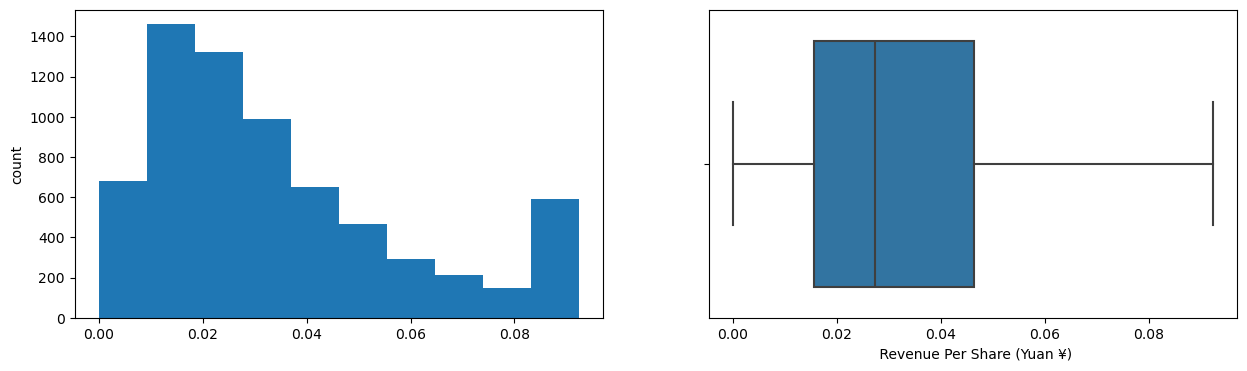

 Operating Profit Per Share (Yuan ¥)
Skew : 0.56


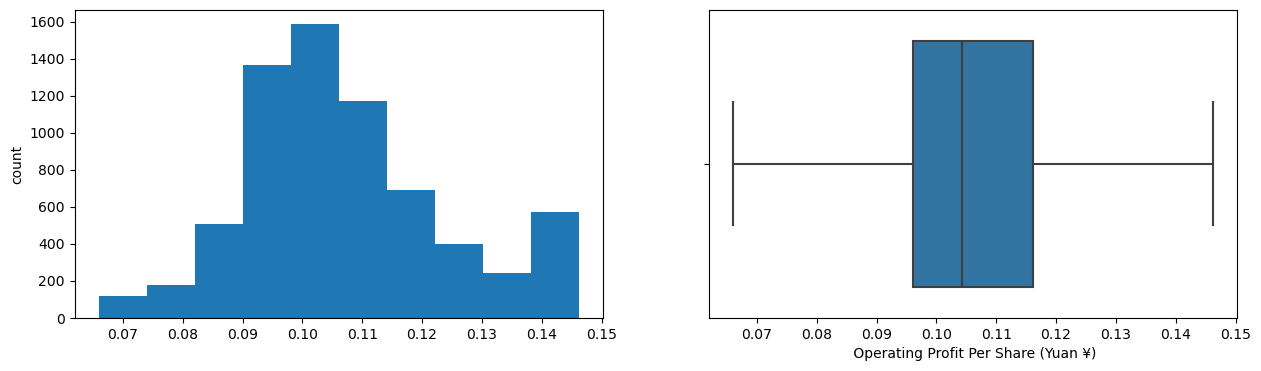

 Per Share Net profit before tax (Yuan ¥)
Skew : 0.36


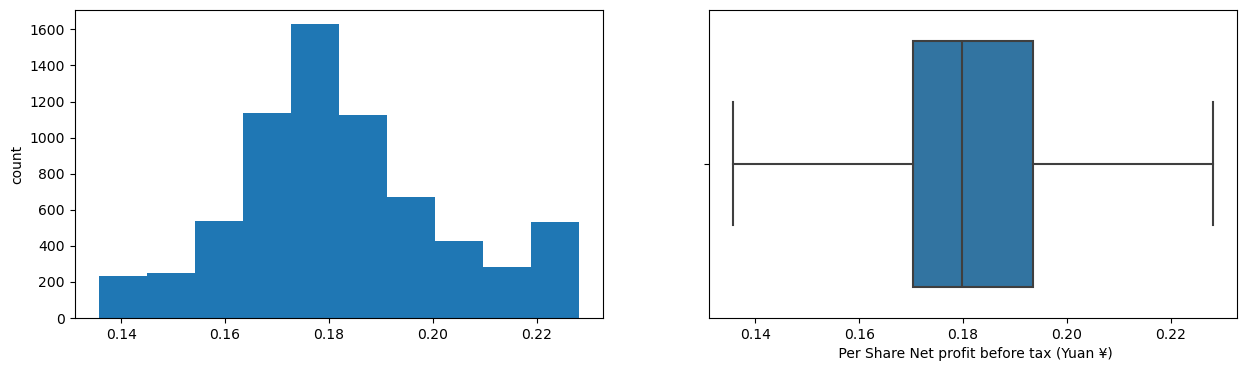

 Realized Sales Gross Profit Growth Rate
Skew : 0.36


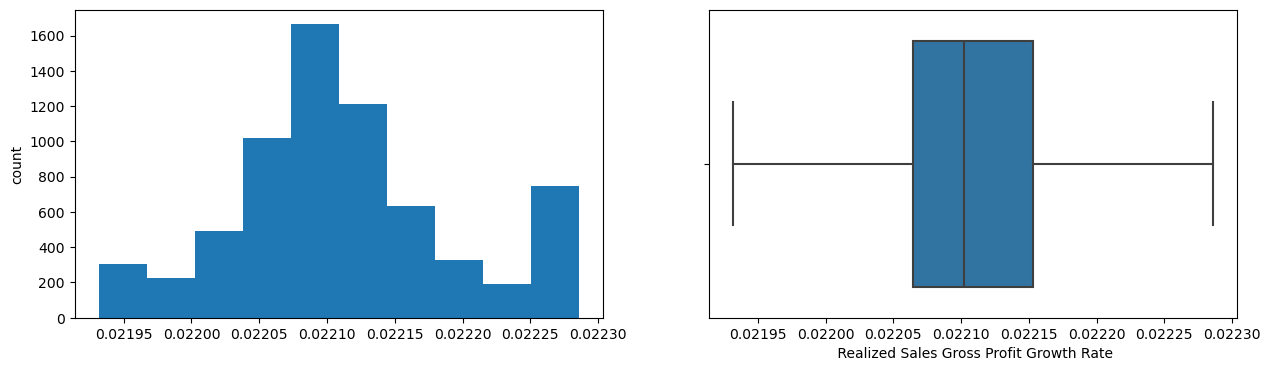

 Operating Profit Growth Rate
Skew : 0.17


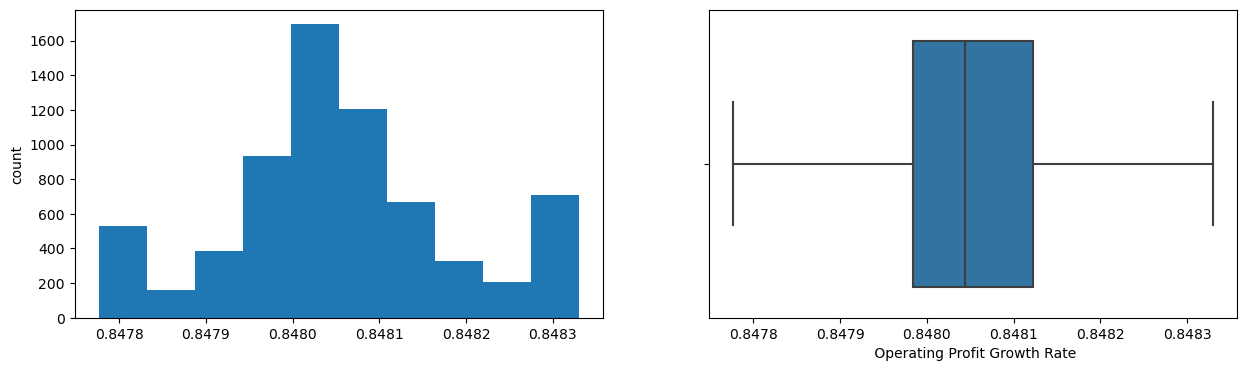

 After-tax Net Profit Growth Rate
Skew : 0.04


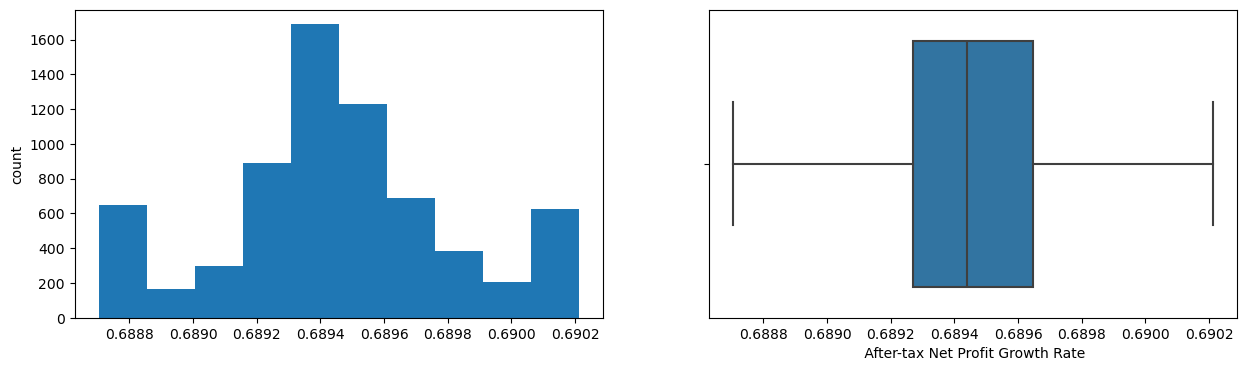

 Regular Net Profit Growth Rate
Skew : 0.04


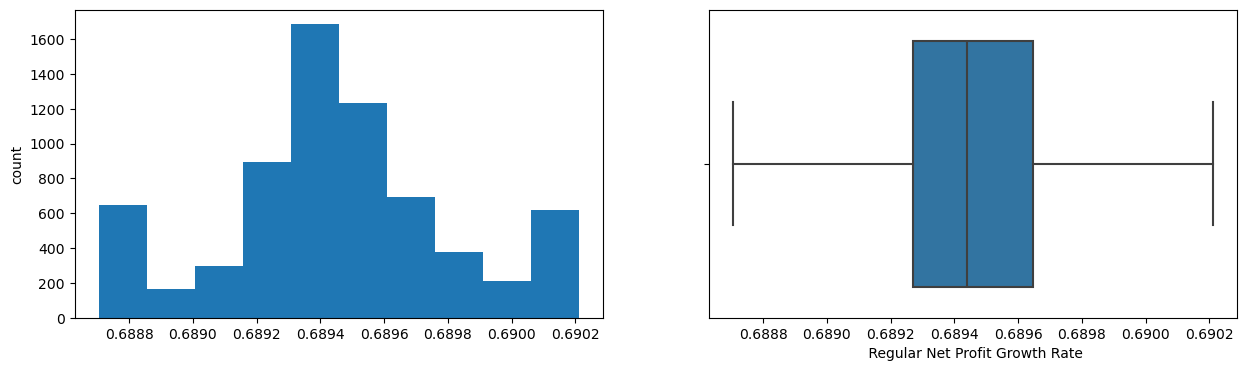

 Continuous Net Profit Growth Rate
Skew : 0.05


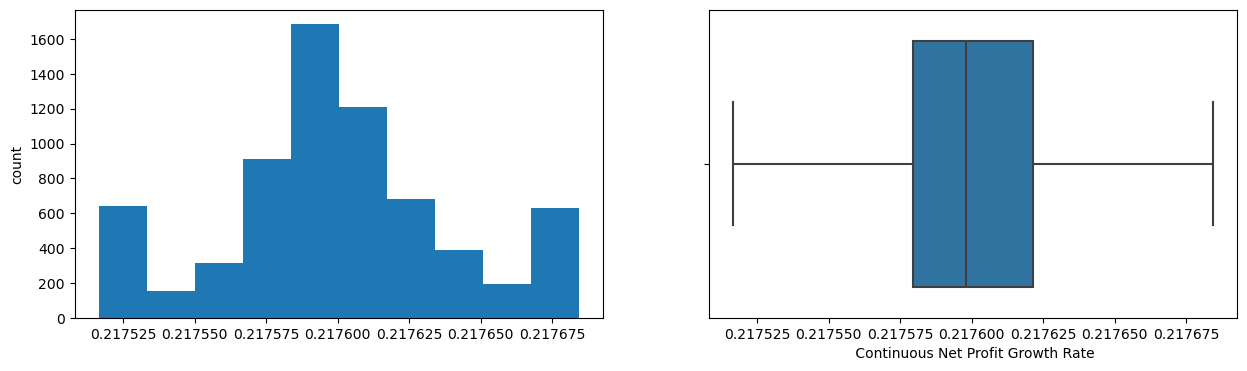

 Total Asset Growth Rate
Skew : -0.78


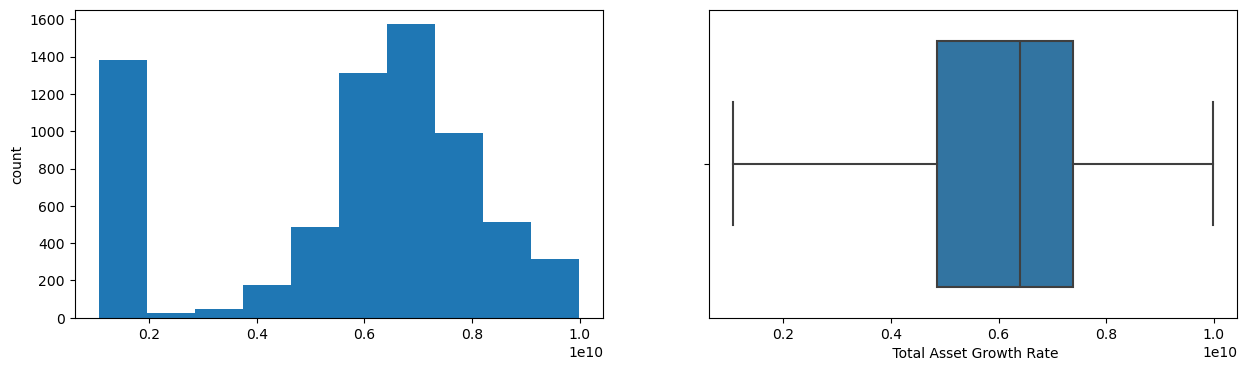

 Net Value Growth Rate
Skew : 0.52


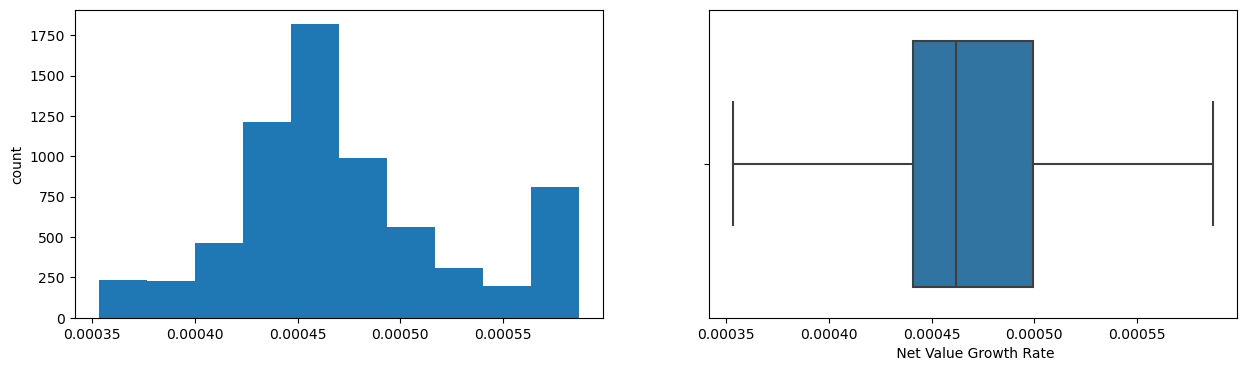

 Total Asset Return Growth Rate Ratio
Skew : 0.19


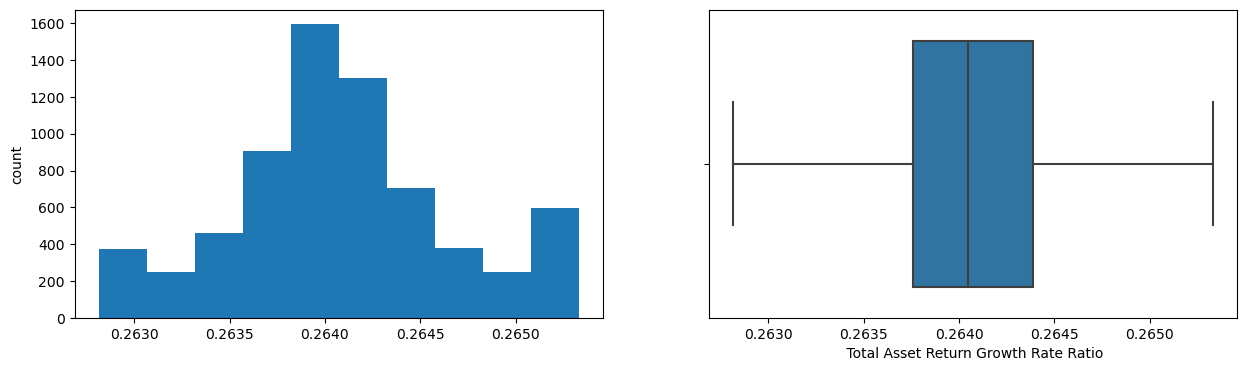

 Cash Reinvestment %
Skew : -0.09


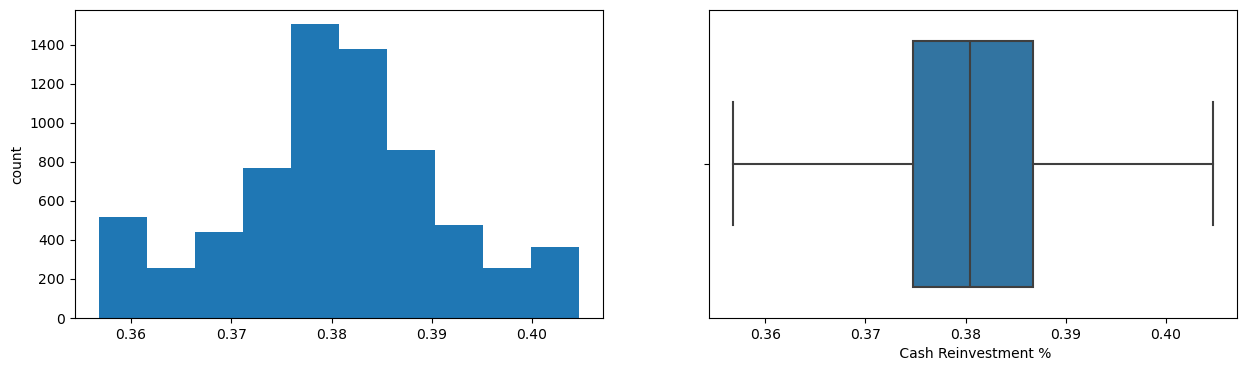

 Current Ratio
Skew : 1.0


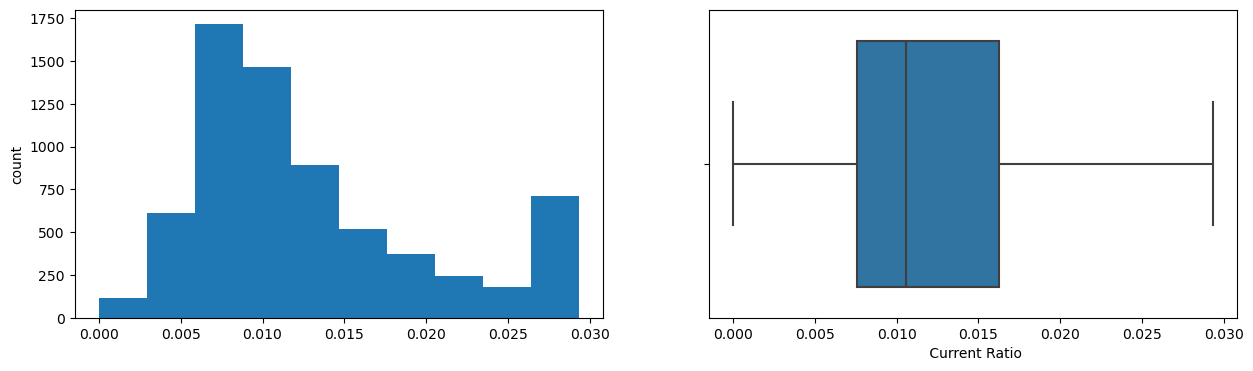

 Quick Ratio
Skew : 0.97


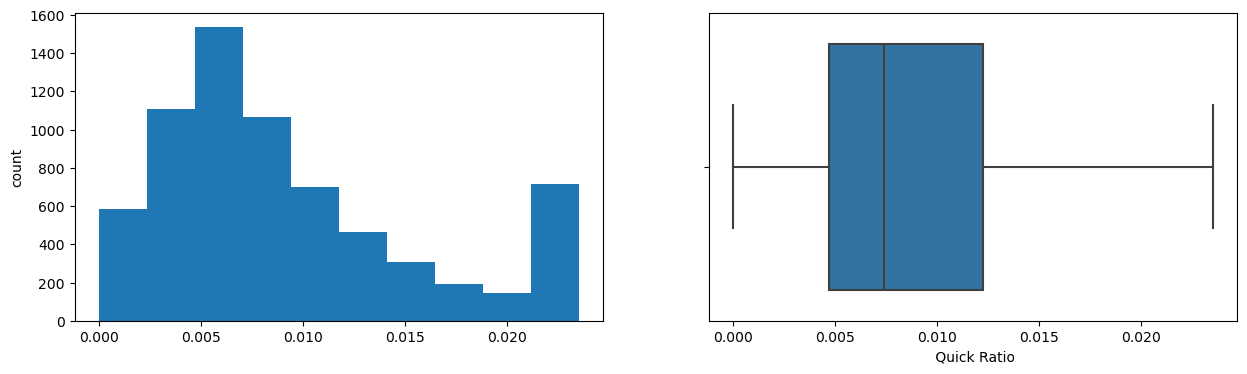

 Interest Expense Ratio
Skew : 0.41


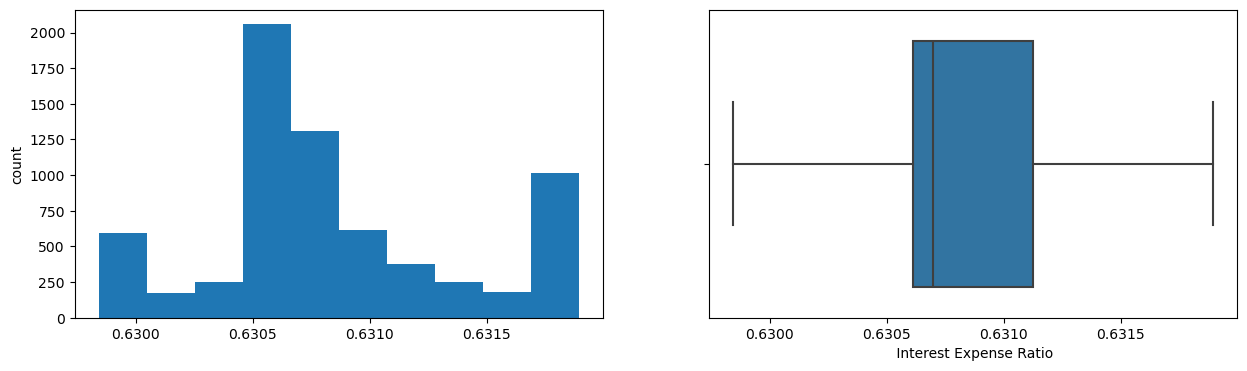

 Total debt/Total net worth
Skew : 0.99


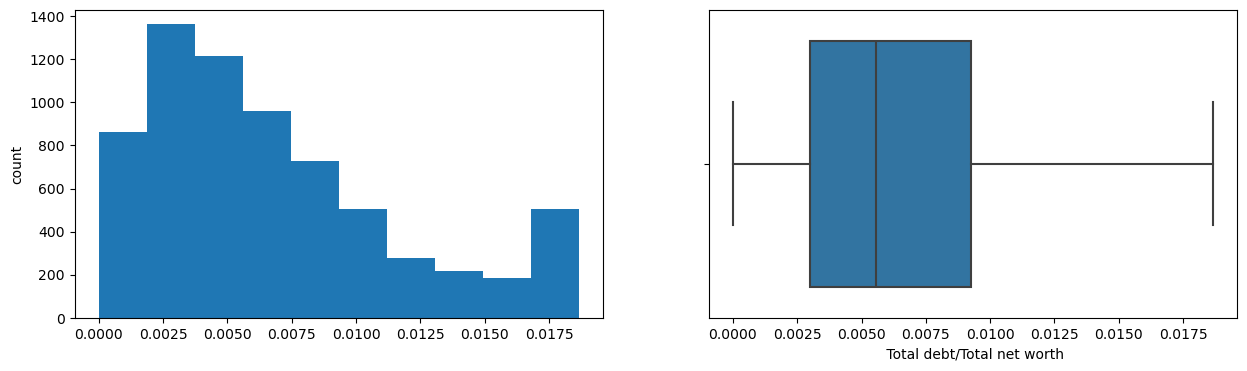

 Debt ratio %
Skew : 0.25


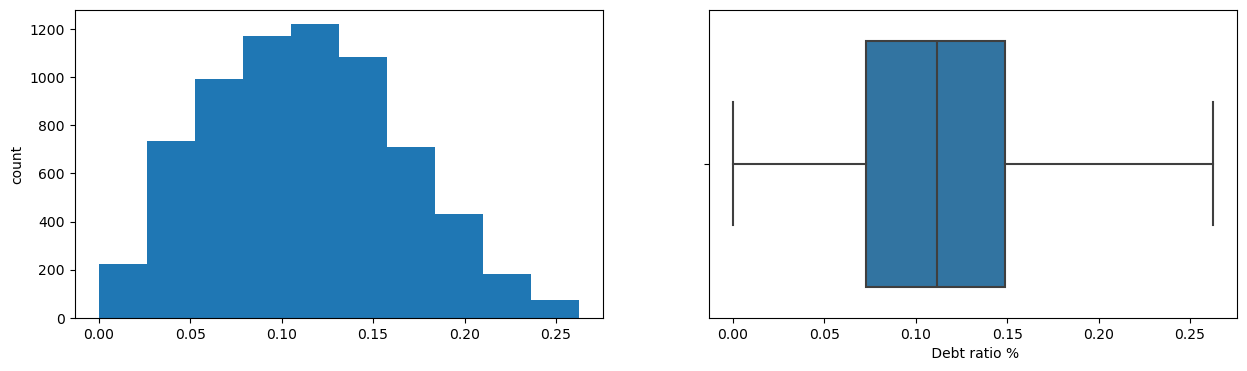

 Net worth/Assets
Skew : -0.25


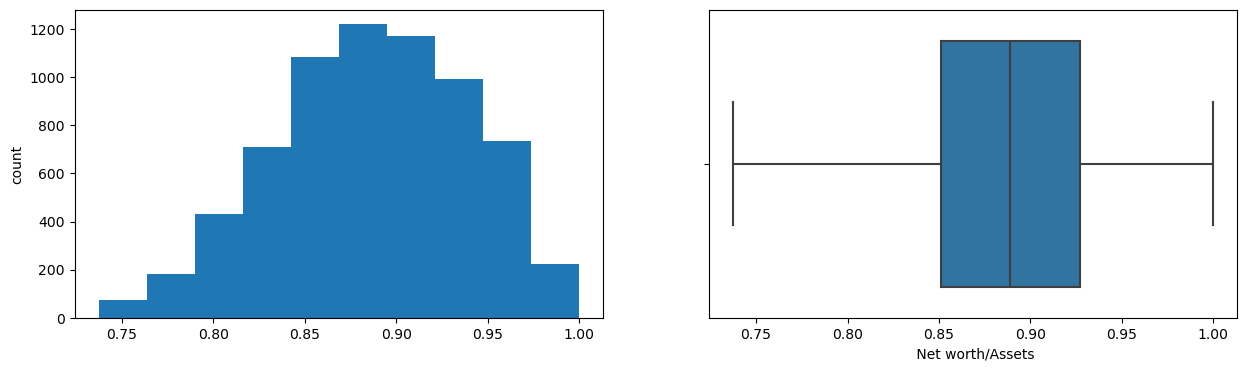

 Long-term fund suitability ratio (A)
Skew : 1.15


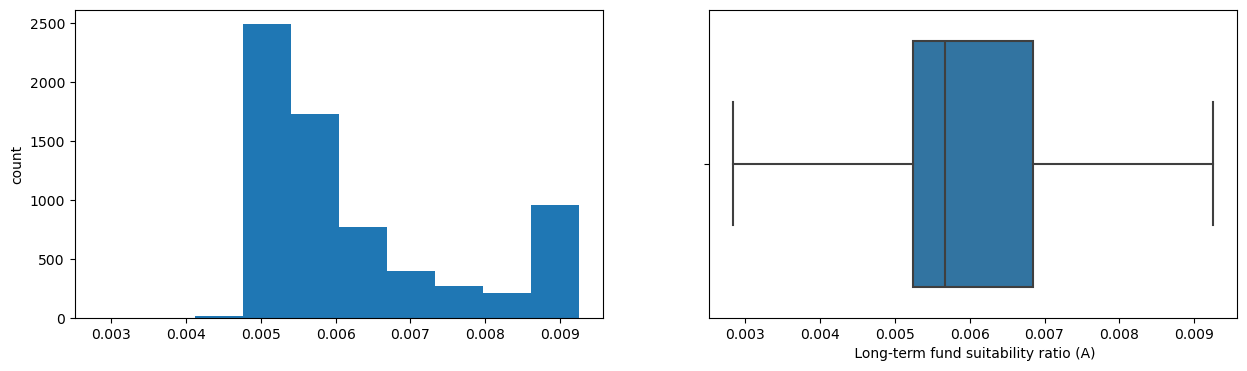

 Borrowing dependency
Skew : 1.08


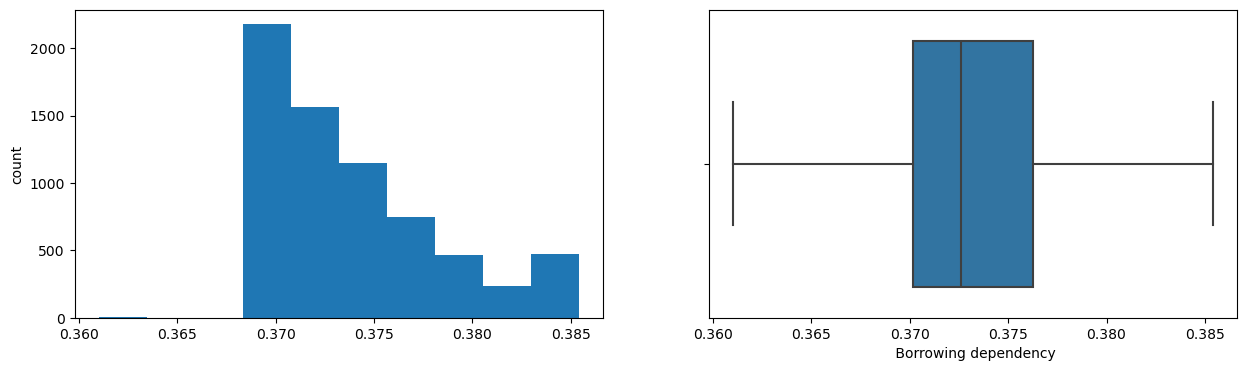

 Contingent liabilities/Net worth
Skew : 1.22


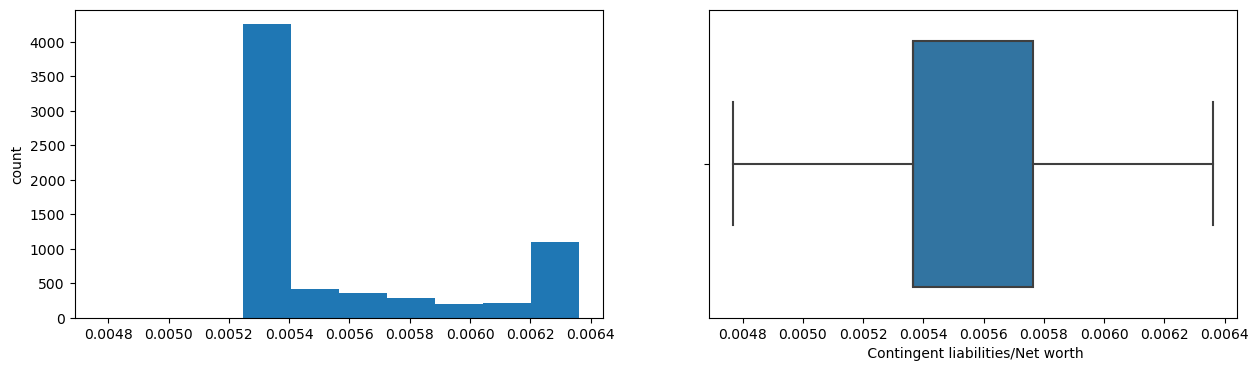

 Operating profit/Paid-in capital
Skew : 0.56


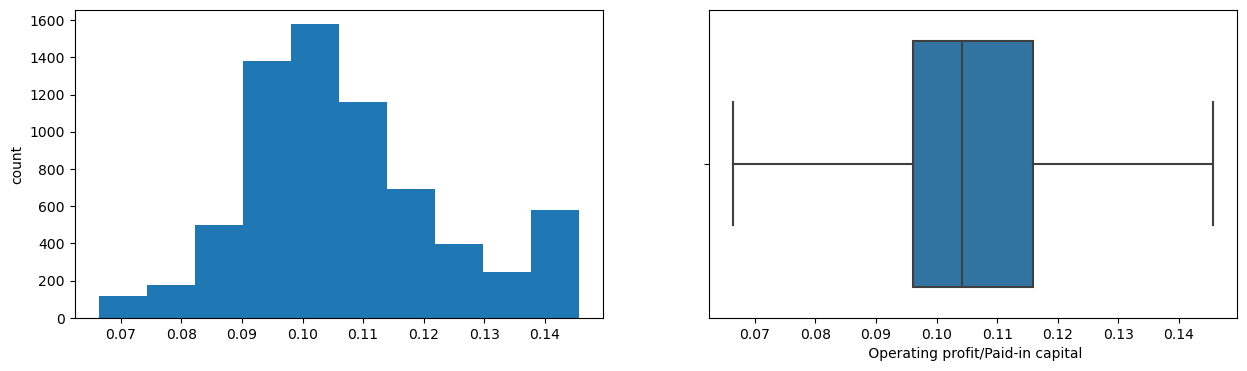

 Net profit before tax/Paid-in capital
Skew : 0.37


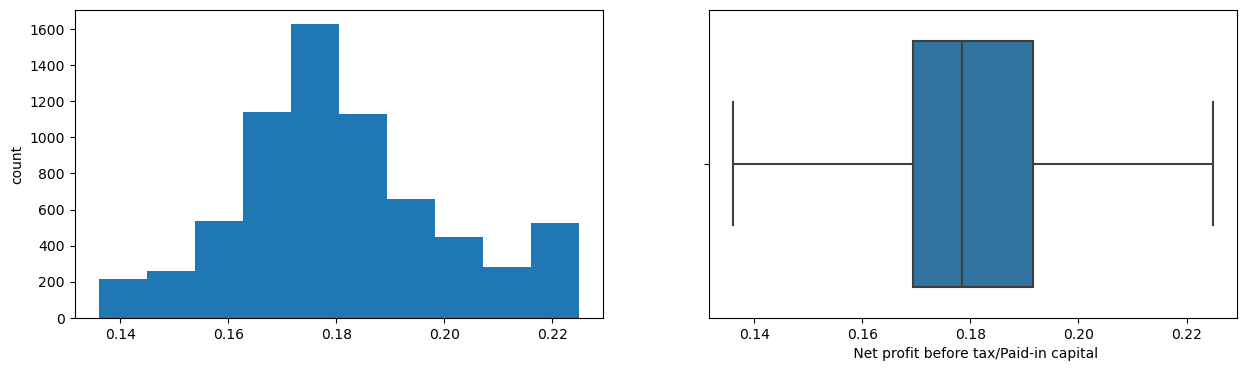

 Inventory and accounts receivable/Net value
Skew : 0.97


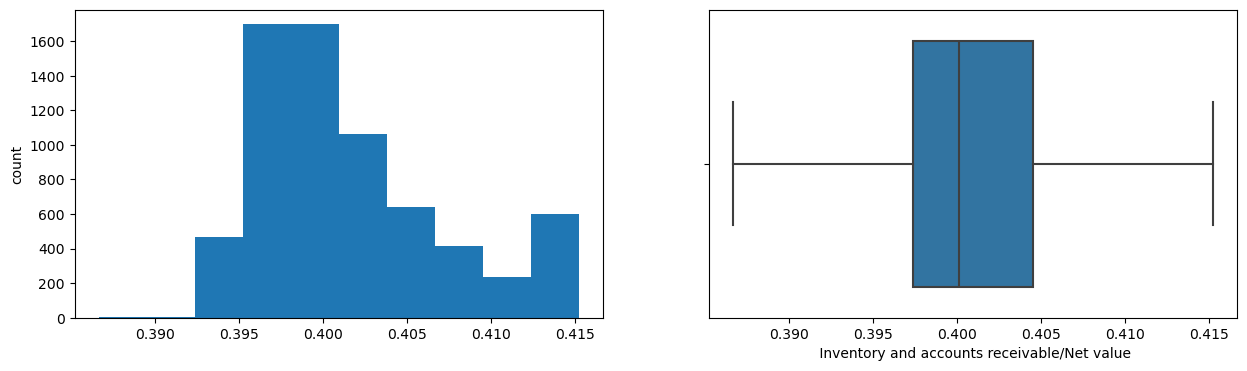

 Total Asset Turnover
Skew : 0.86


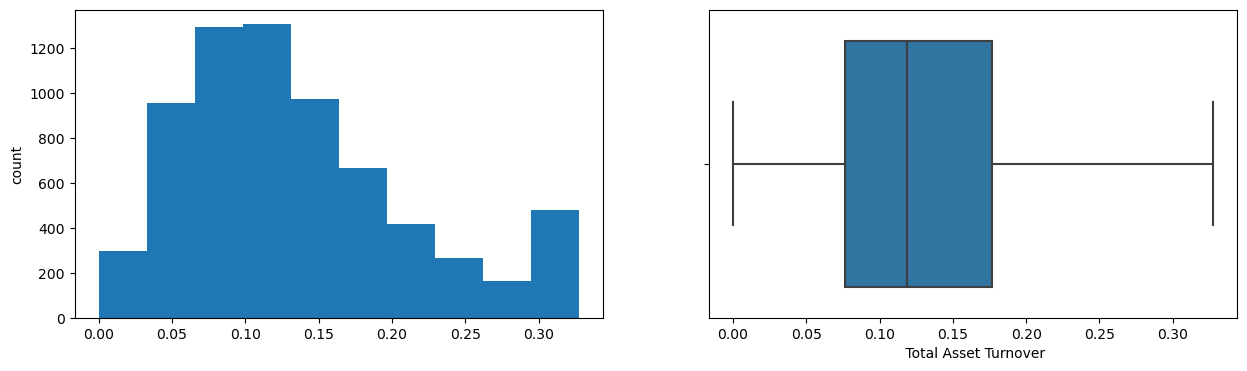

 Accounts Receivable Turnover
Skew : 1.03


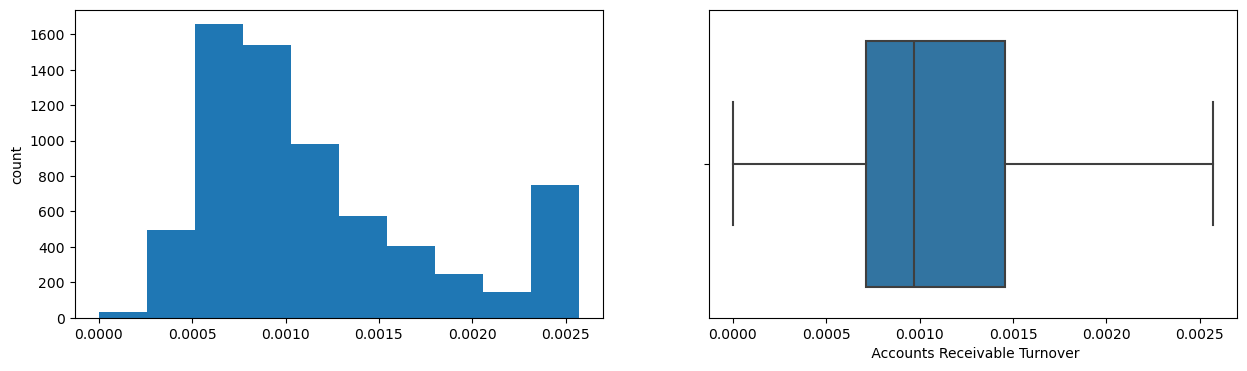

 Average Collection Days
Skew : 0.53


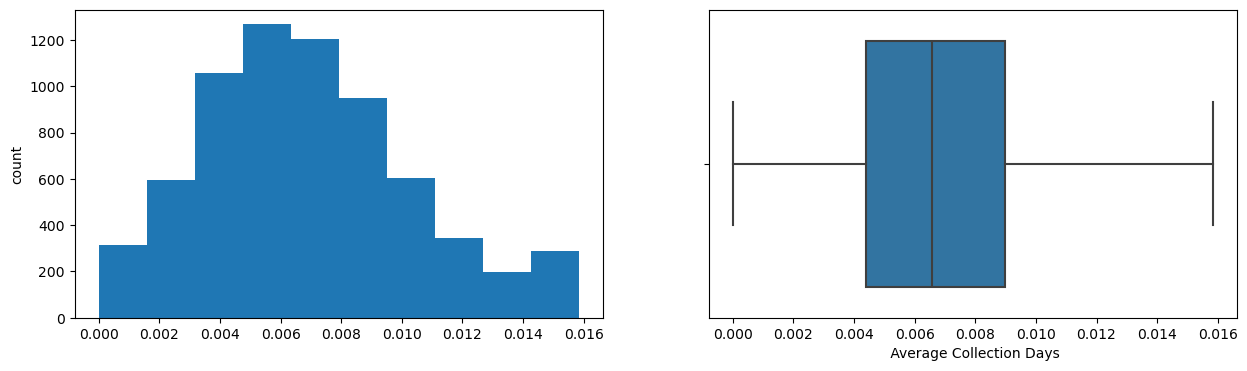

 Inventory Turnover Rate (times)
Skew : 1.14


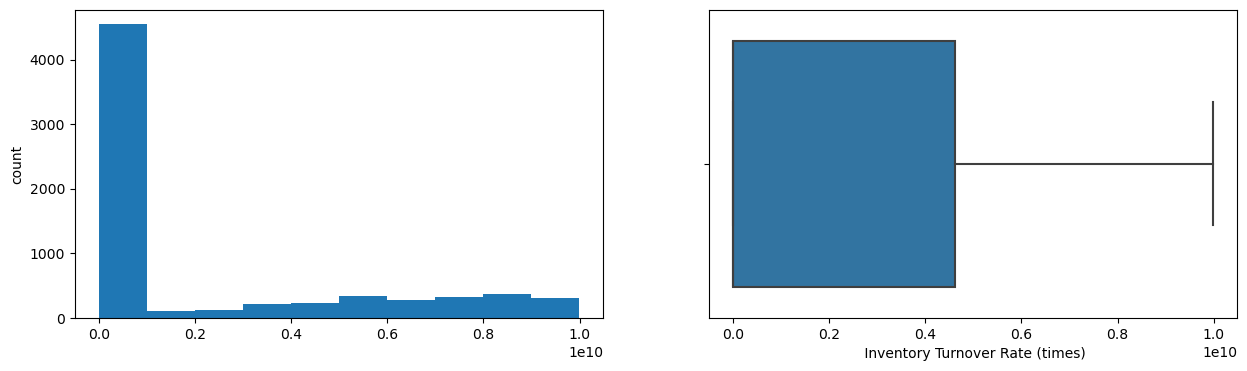

 Fixed Assets Turnover Frequency
Skew : 1.15


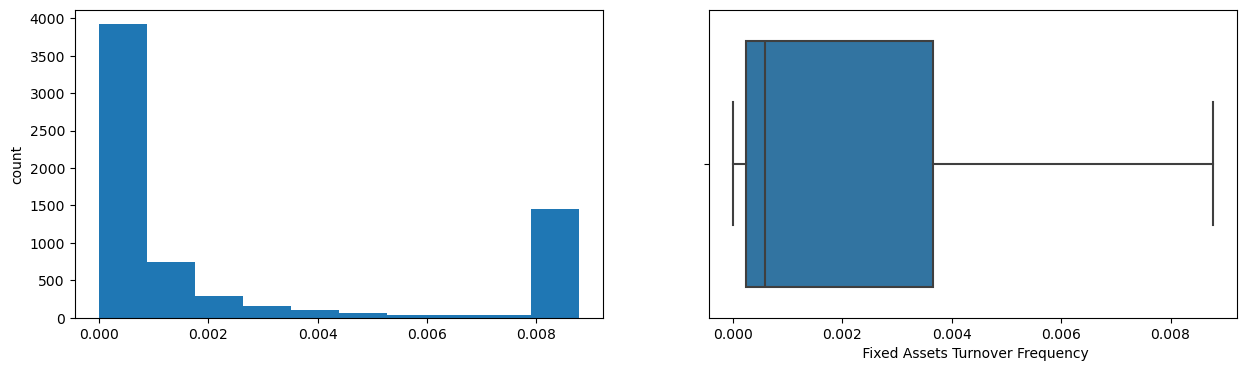

 Net Worth Turnover Rate (times)
Skew : 0.99


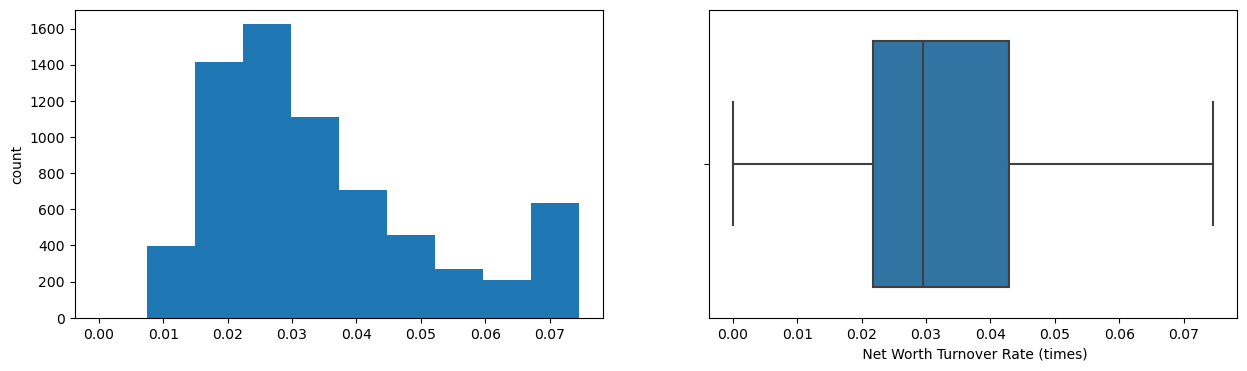

 Revenue per person
Skew : 1.1


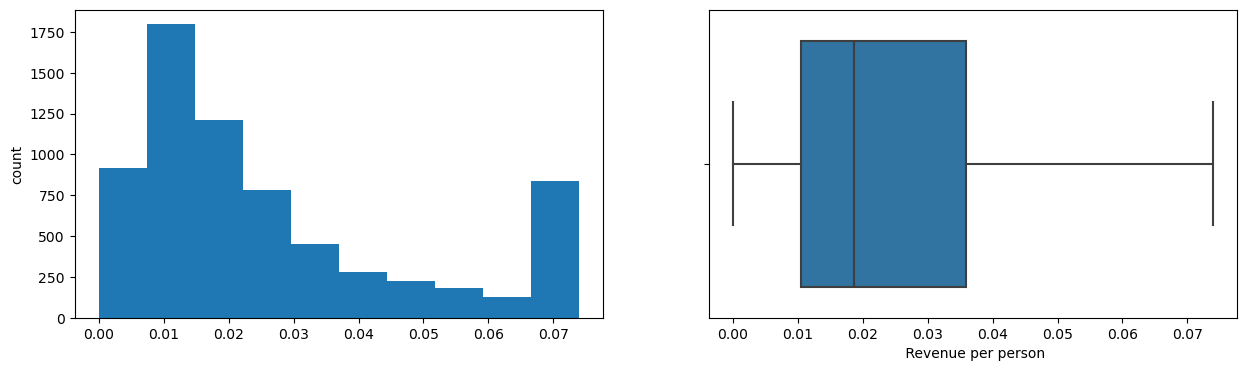

 Operating profit per person
Skew : 0.35


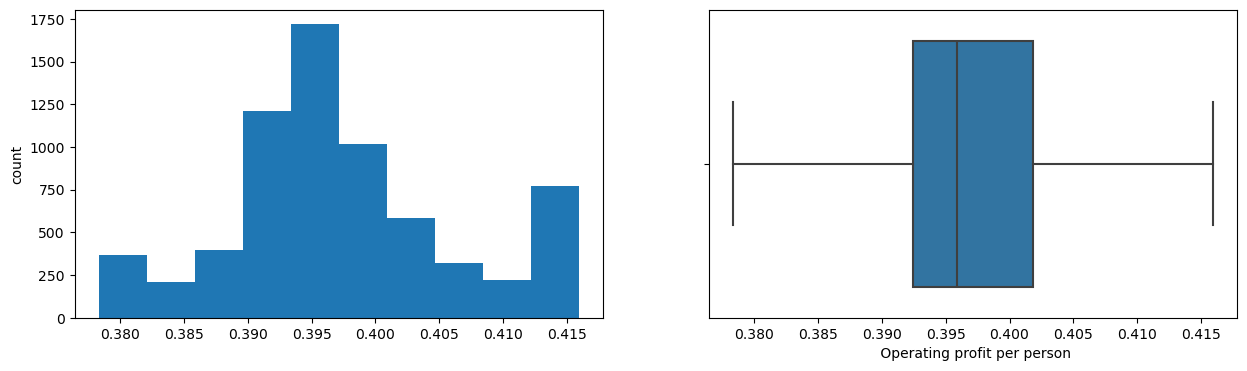

 Allocation rate per person
Skew : 1.07


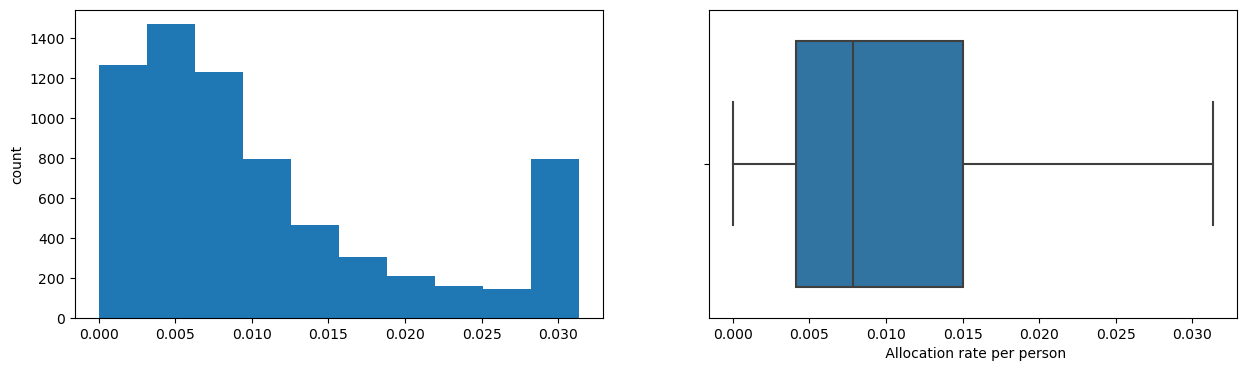

 Working Capital to Total Assets
Skew : 0.26


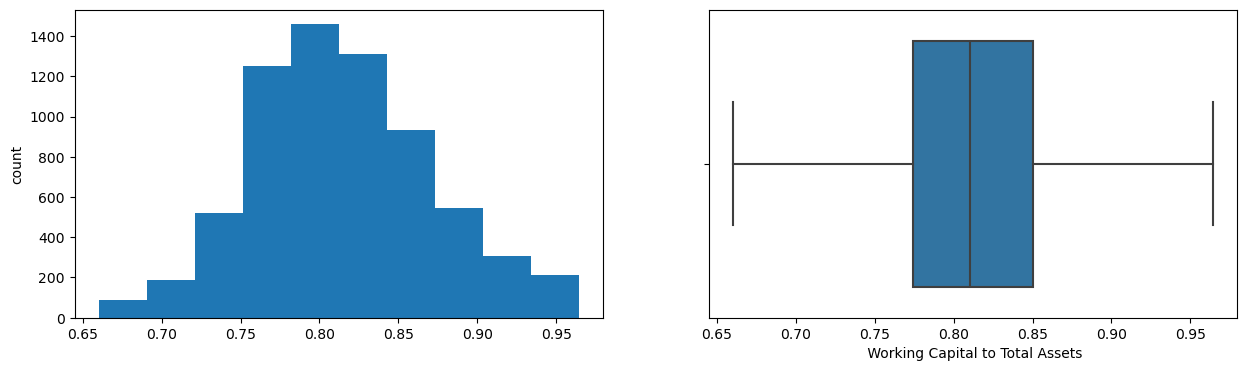

 Quick Assets/Total Assets
Skew : 0.34


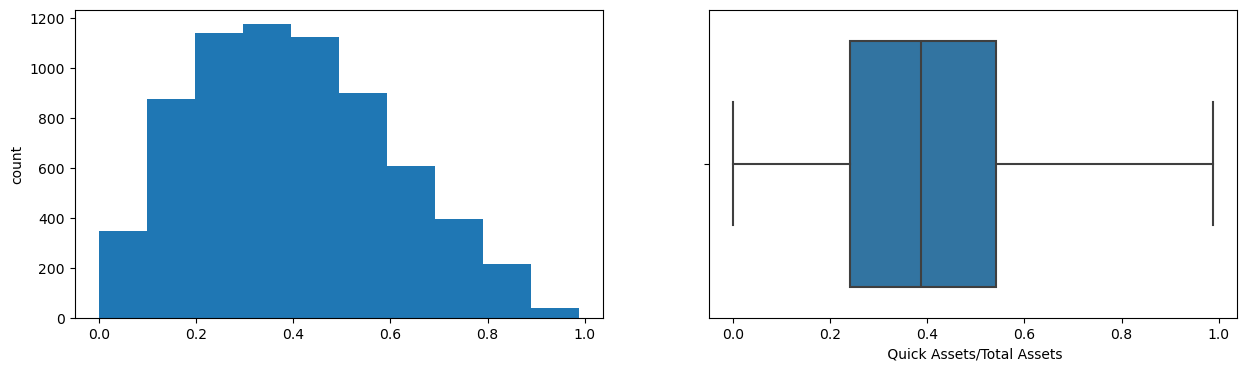

 Current Assets/Total Assets
Skew : 0.08


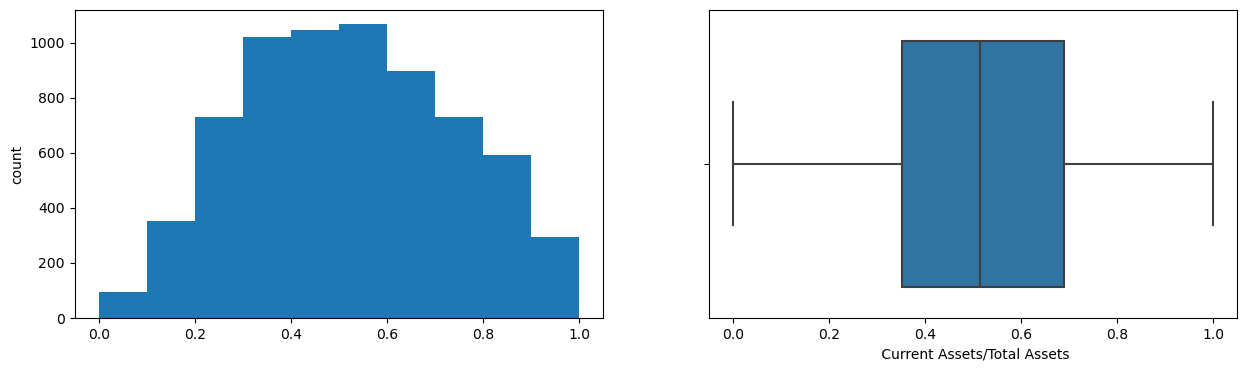

 Cash/Total Assets
Skew : 1.13


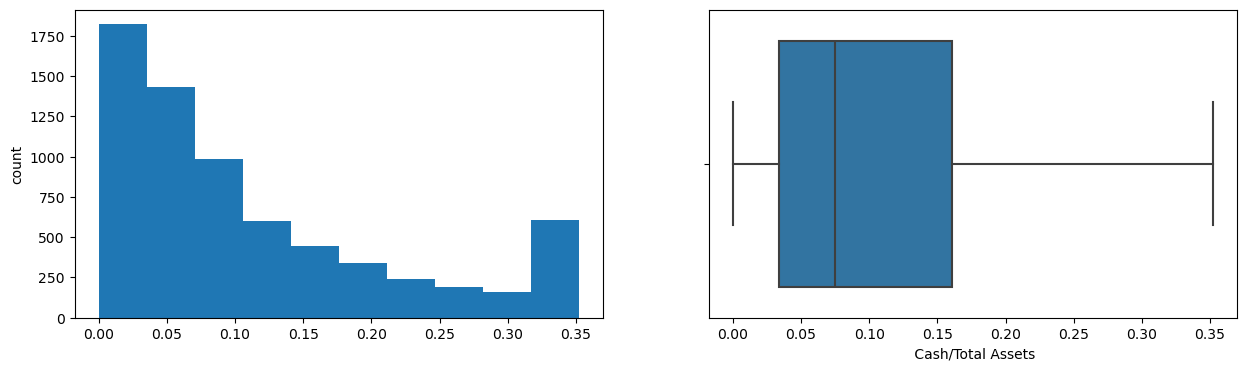

 Quick Assets/Current Liability
Skew : 0.98


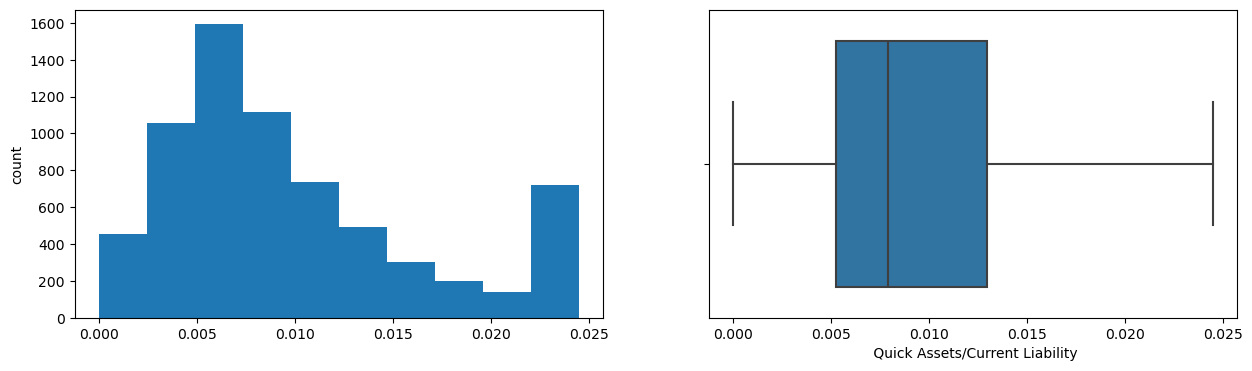

 Cash/Current Liability
Skew : 1.17


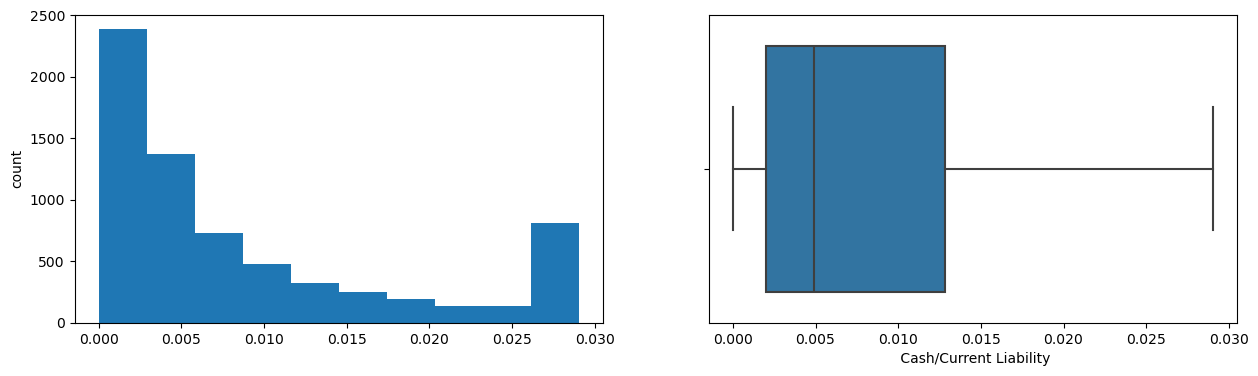

 Current Liability to Assets
Skew : 0.67


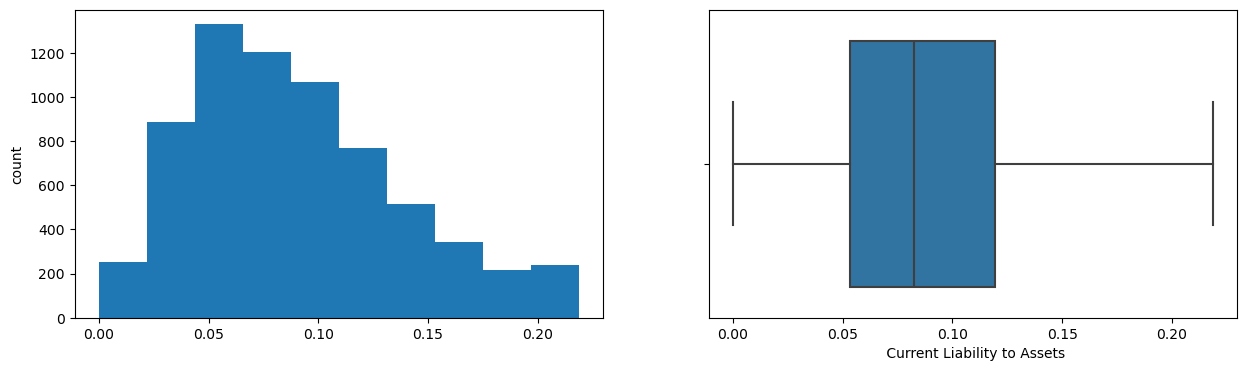

 Operating Funds to Liability
Skew : 0.44


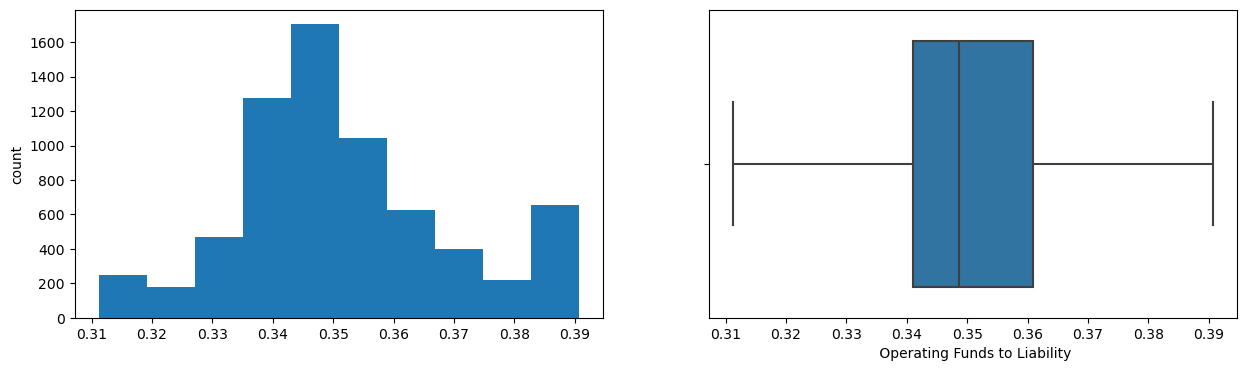

 Inventory/Working Capital
Skew : 0.37


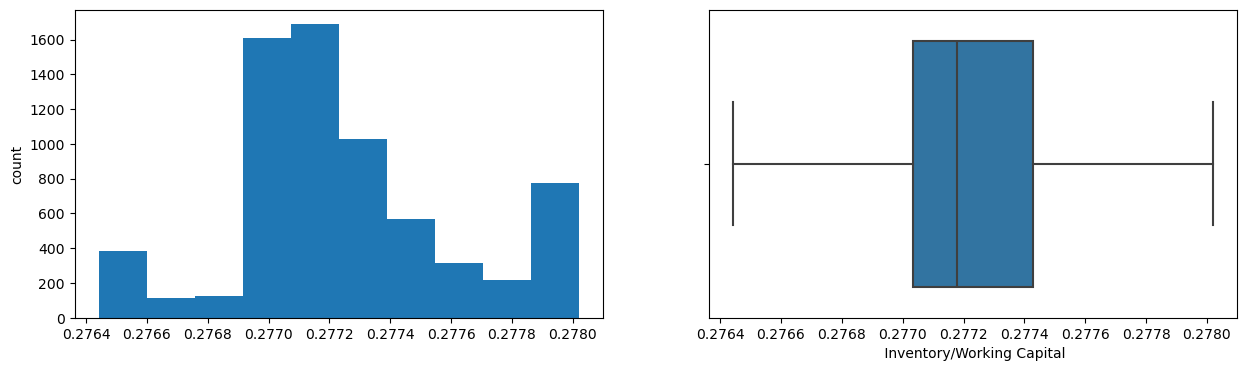

 Inventory/Current Liability
Skew : 0.96


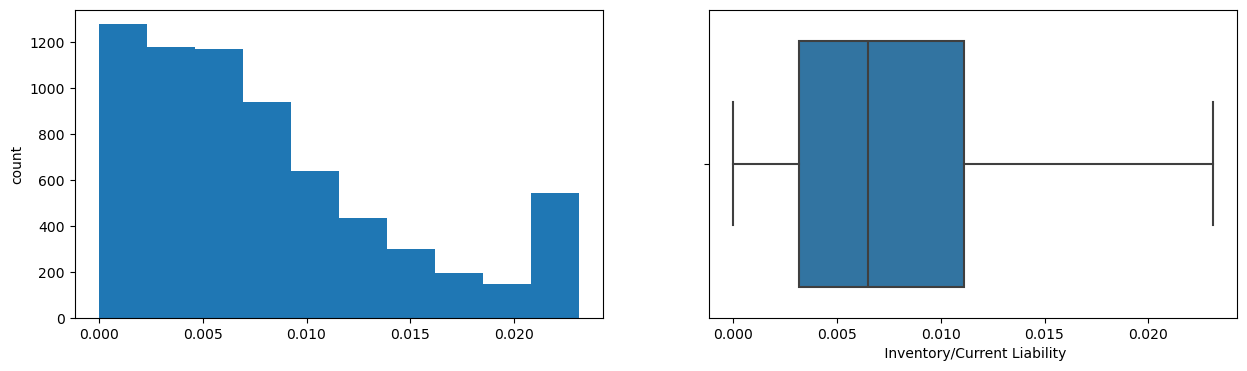

 Current Liabilities/Liability
Skew : -0.8


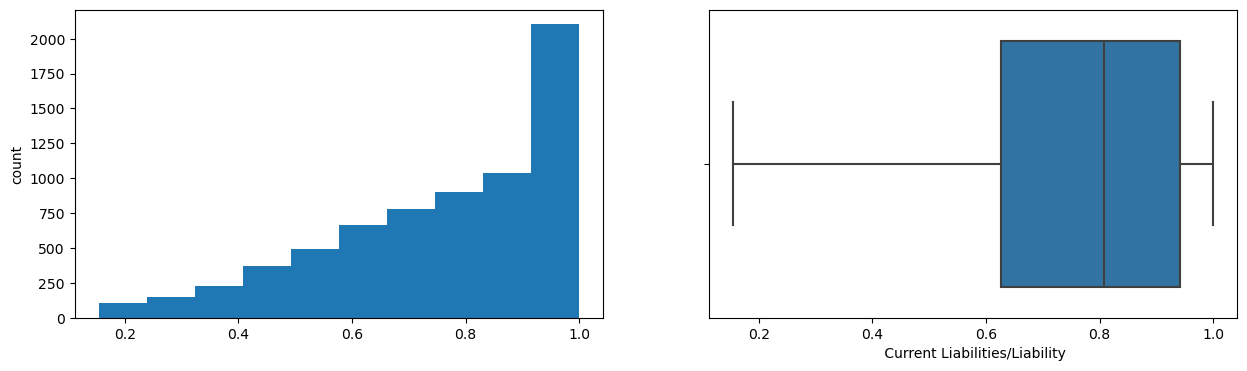

 Working Capital/Equity
Skew : -0.2


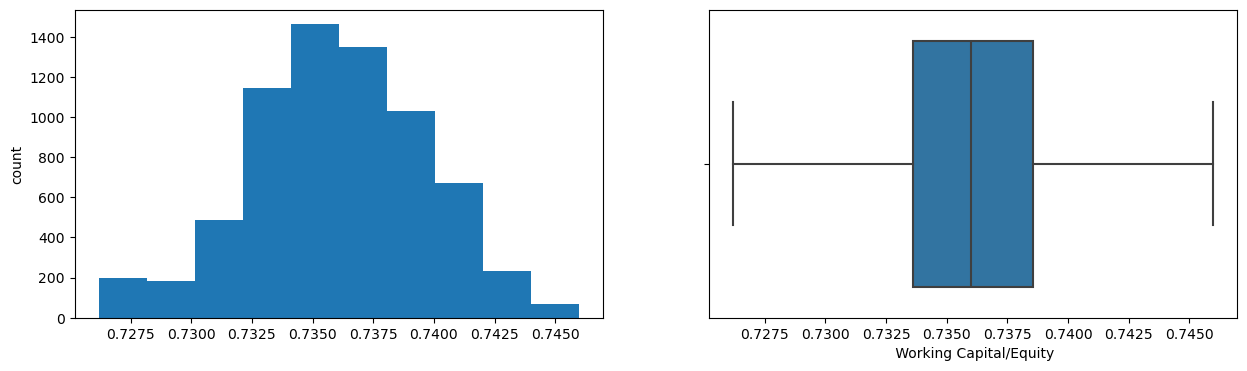

 Current Liabilities/Equity
Skew : 1.03


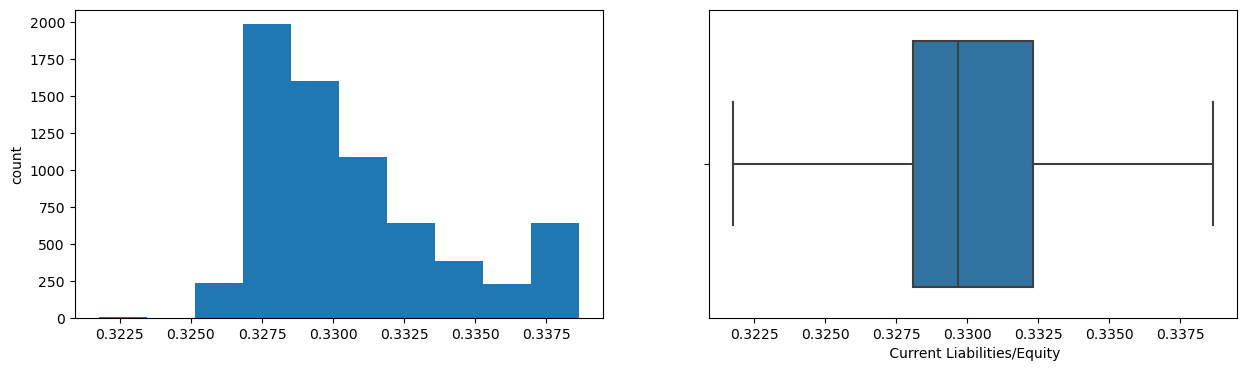

 Long-term Liability to Current Assets
Skew : 1.24


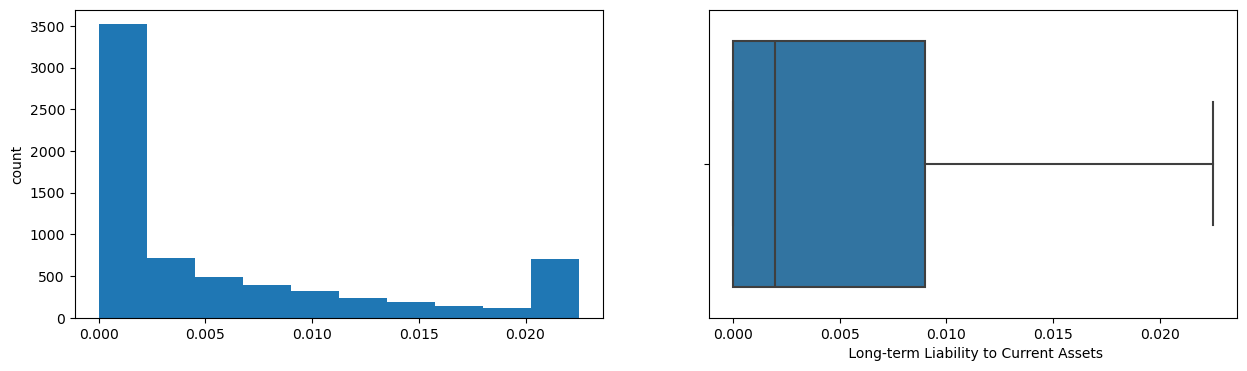

 Retained Earnings to Total Assets
Skew : -0.27


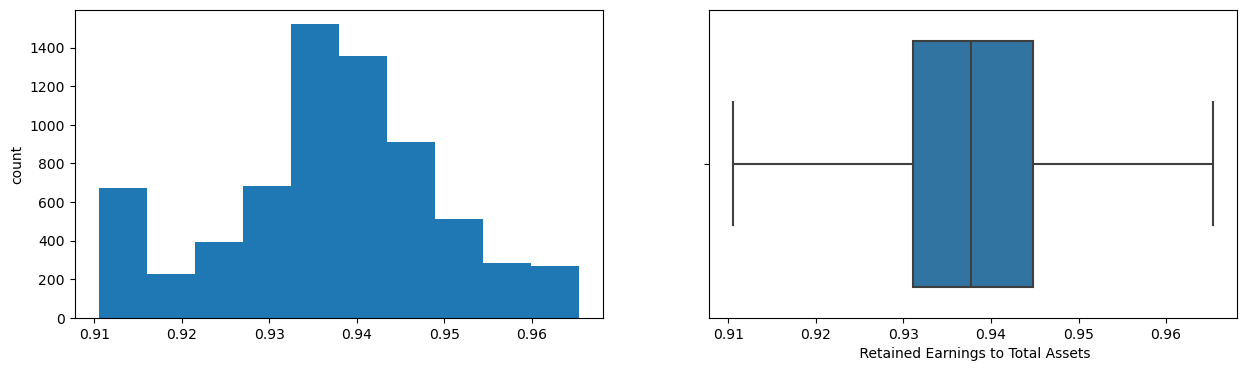

 Total income/Total expense
Skew : 0.4


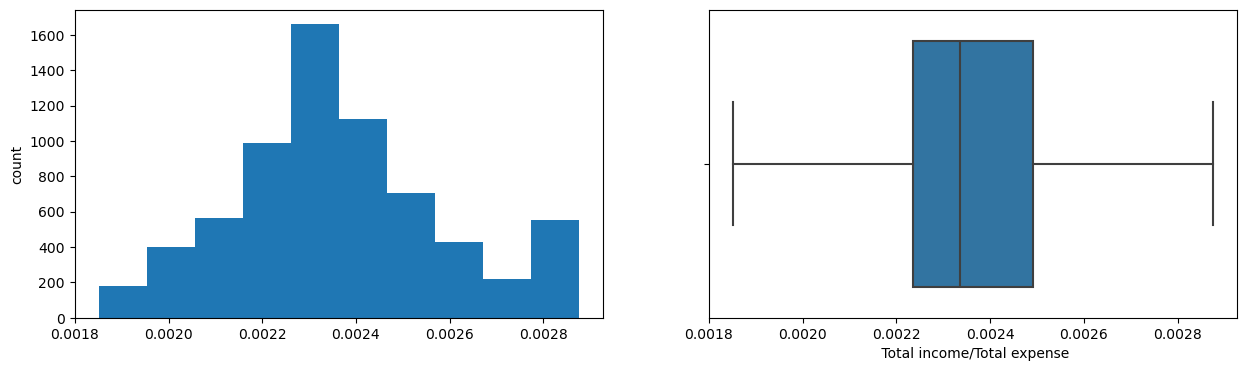

 Total expense/Assets
Skew : 0.96


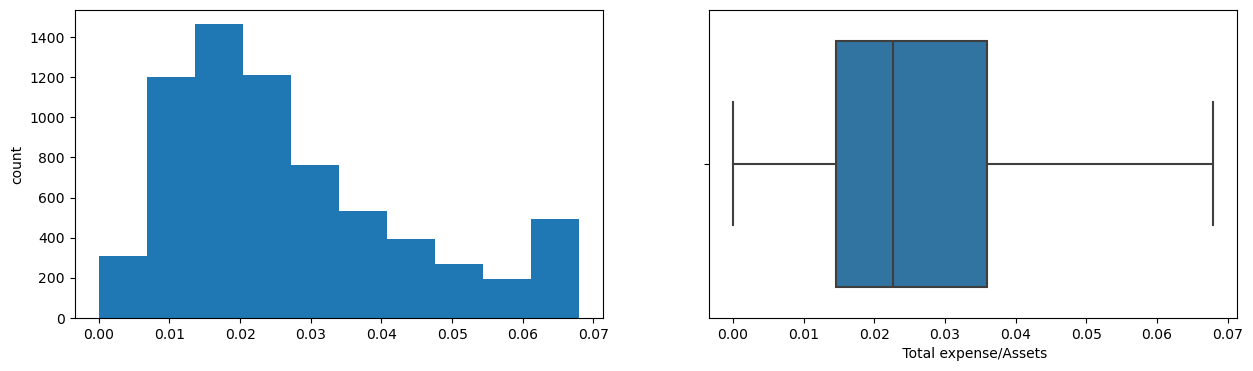

 Current Asset Turnover Rate
Skew : 1.13


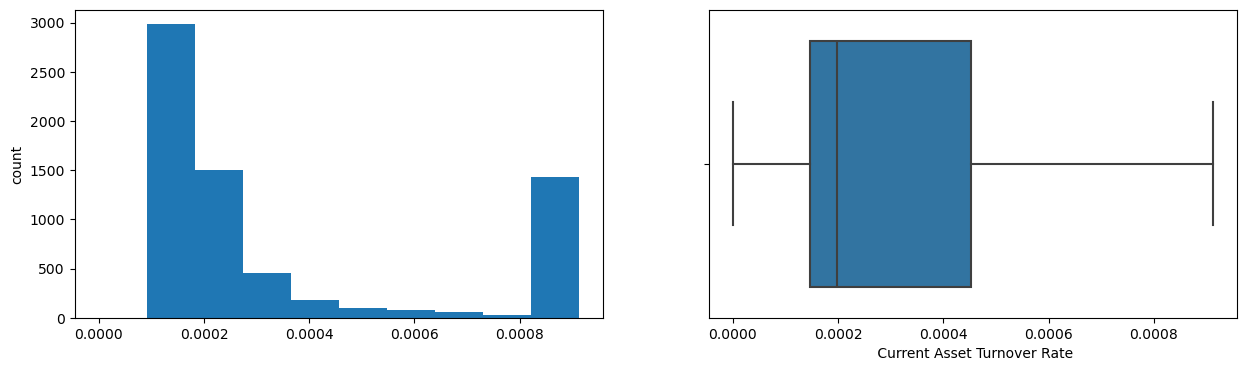

 Quick Asset Turnover Rate
Skew : 1.14


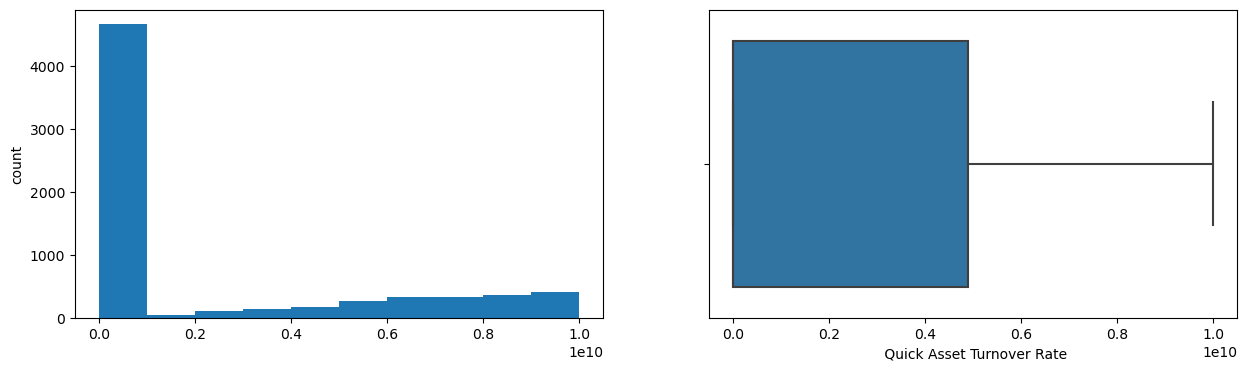

 Working capitcal Turnover Rate
Skew : 0.44


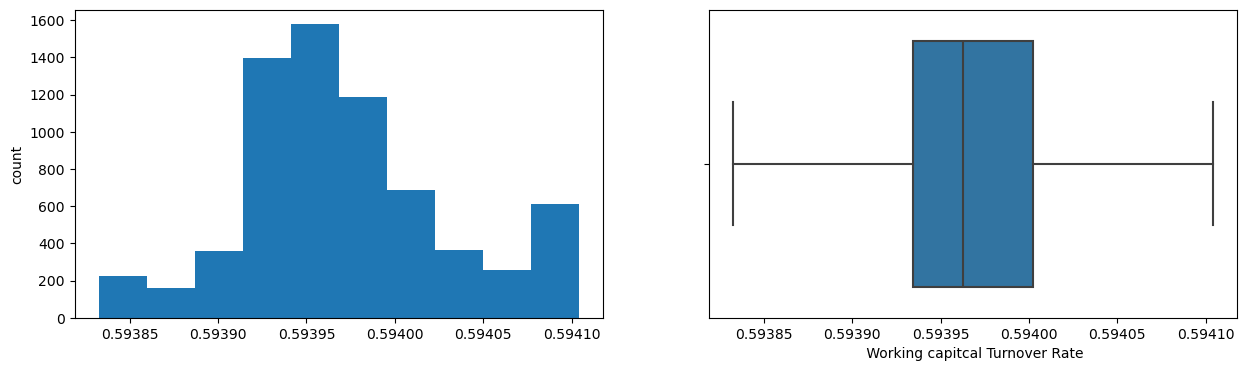

 Cash Turnover Rate
Skew : 0.95


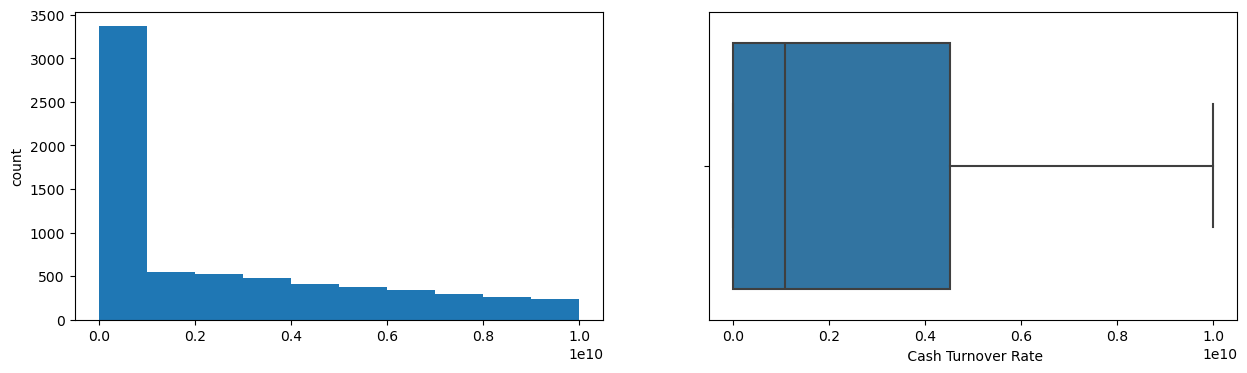

 Cash Flow to Sales
Skew : 0.14


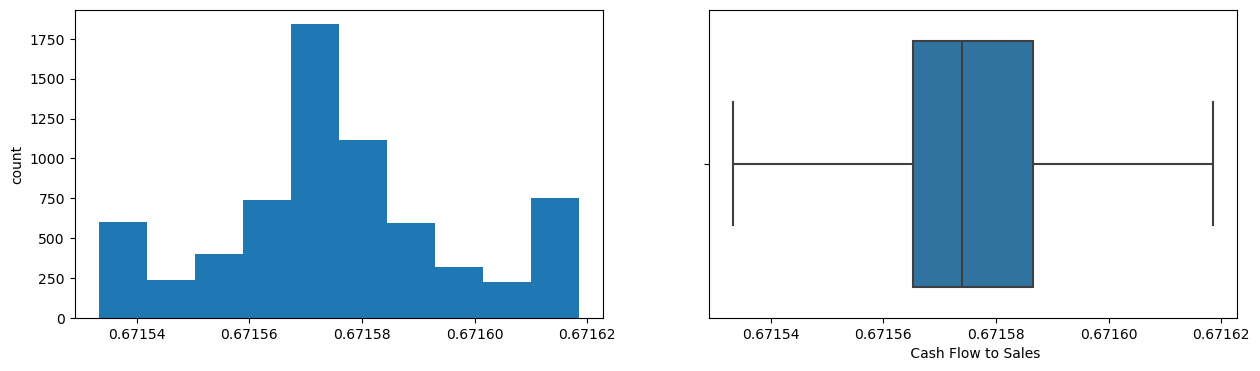

 Fixed Assets to Assets
Skew : 0.85


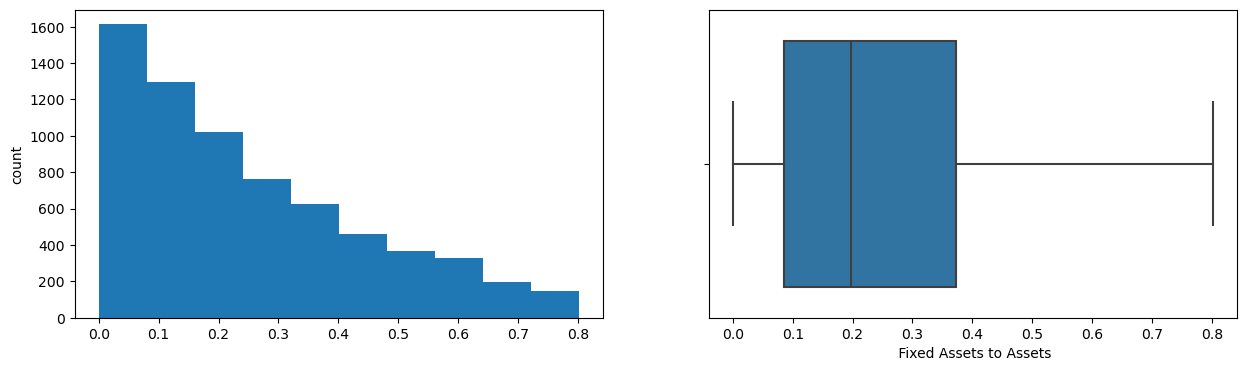

 Current Liability to Liability
Skew : -0.8


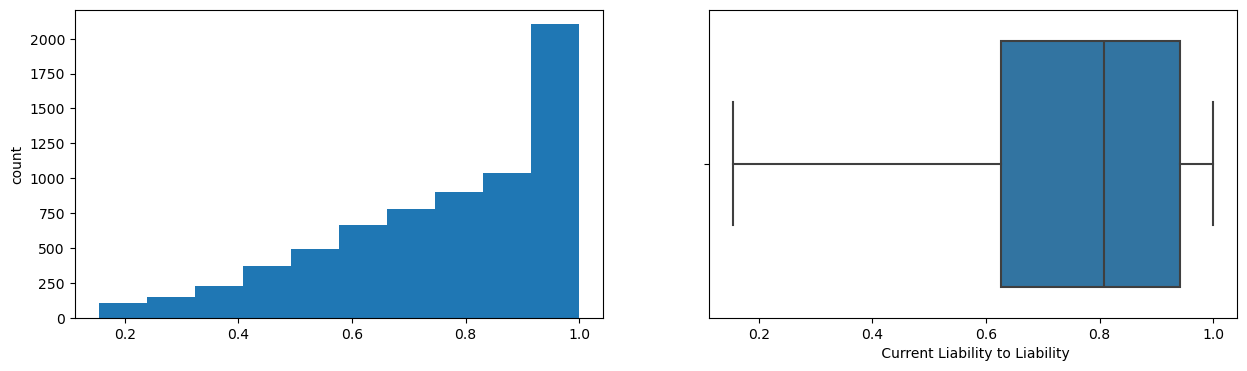

 Current Liability to Equity
Skew : 1.03


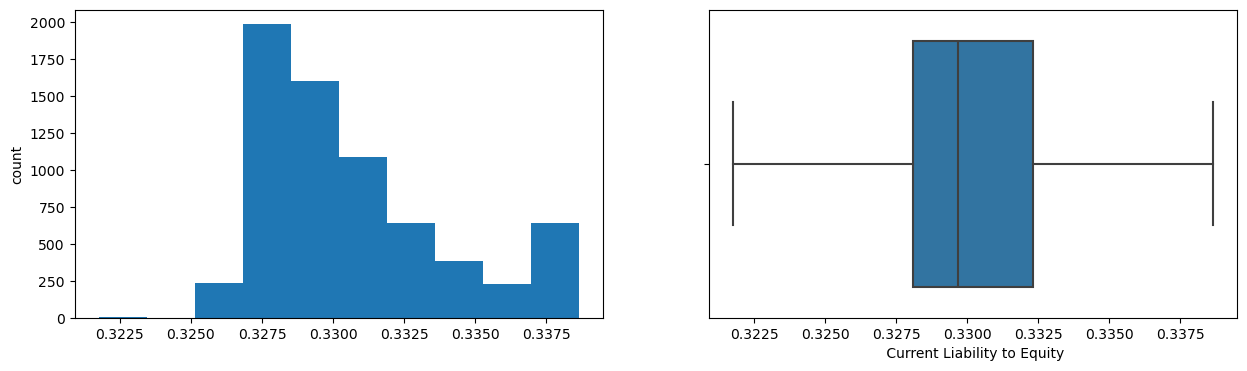

 Equity to Long-term Liability
Skew : 1.21


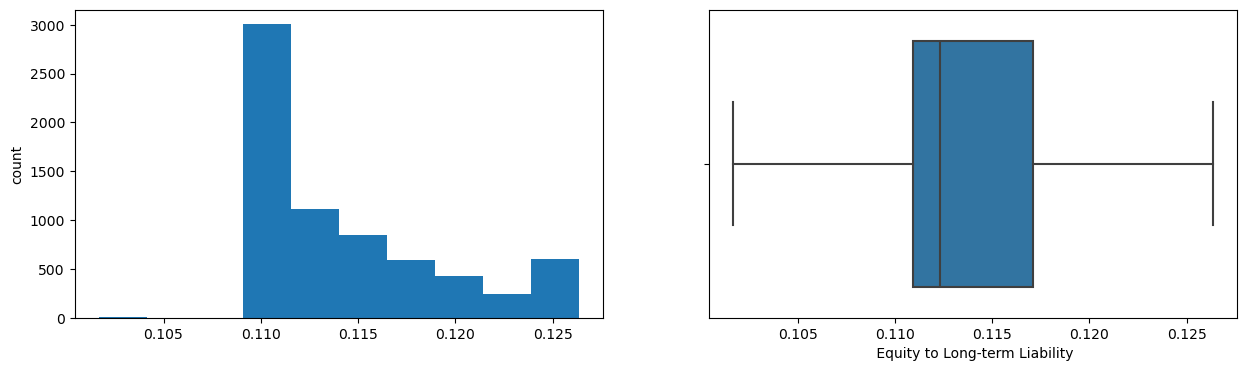

 Cash Flow to Total Assets
Skew : 0.2


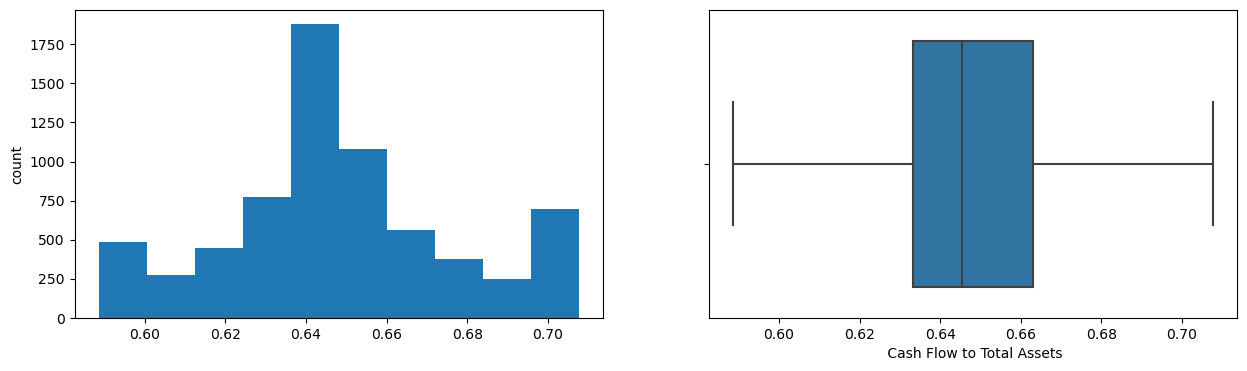

 Cash Flow to Liability
Skew : 0.21


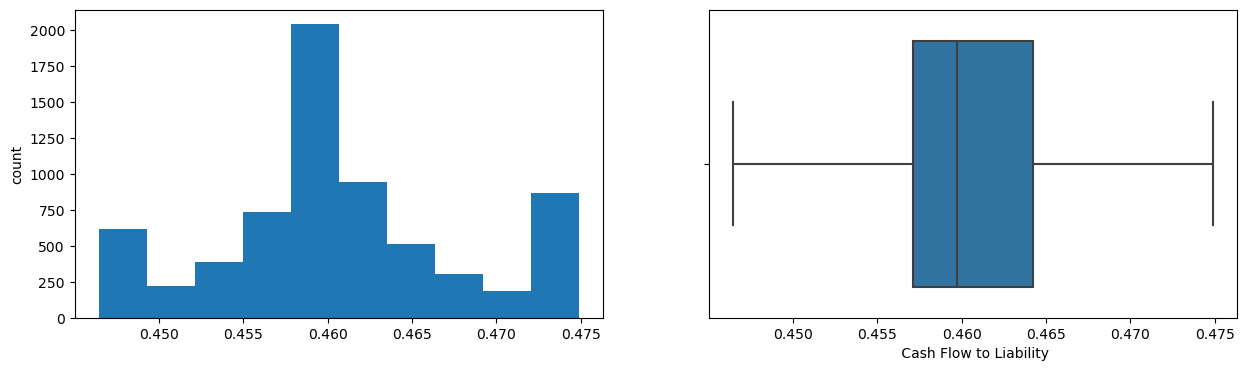

 CFO to Assets
Skew : -0.02


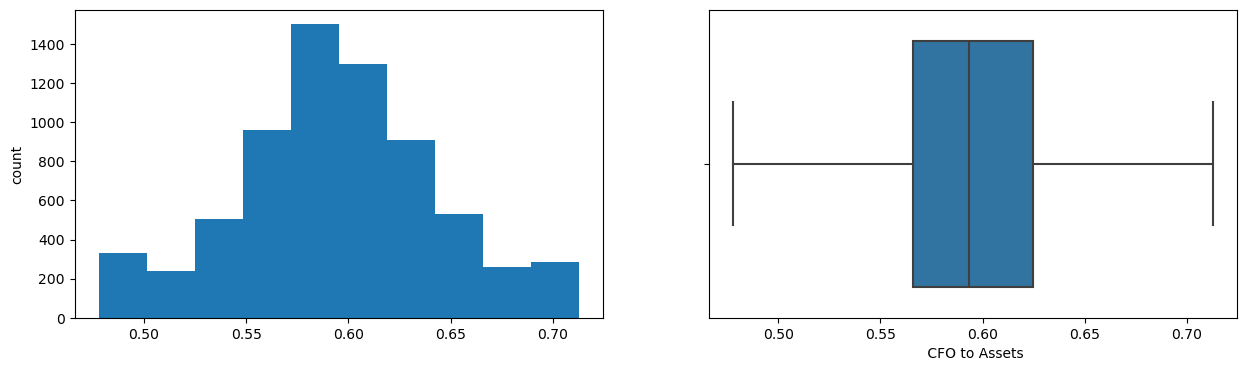

 Cash Flow to Equity
Skew : 0.17


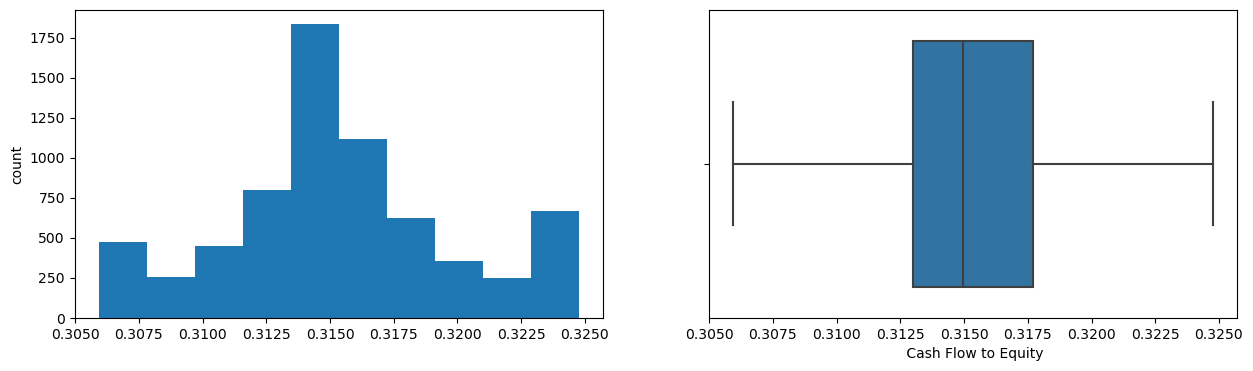

 Current Liability to Current Assets
Skew : 0.71


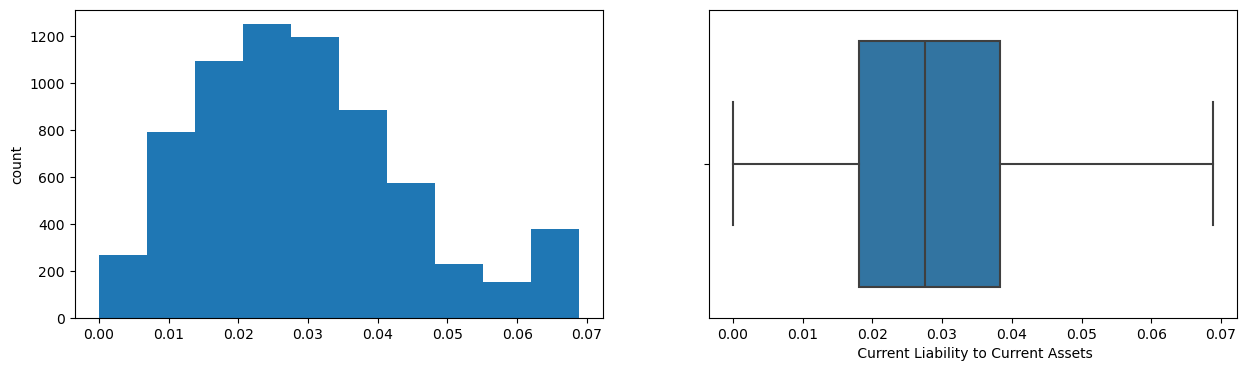

 Liability-Assets Flag
Skew : 0.0


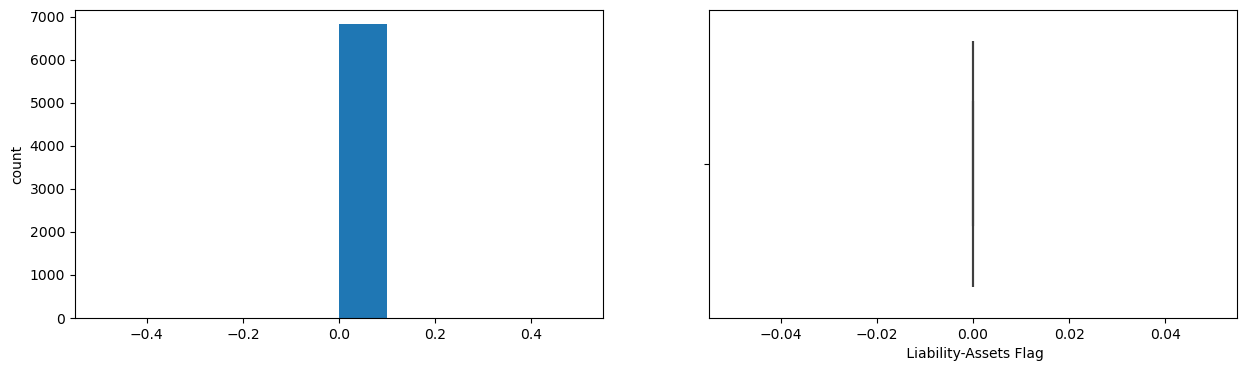

 Net Income to Total Assets
Skew : -0.14


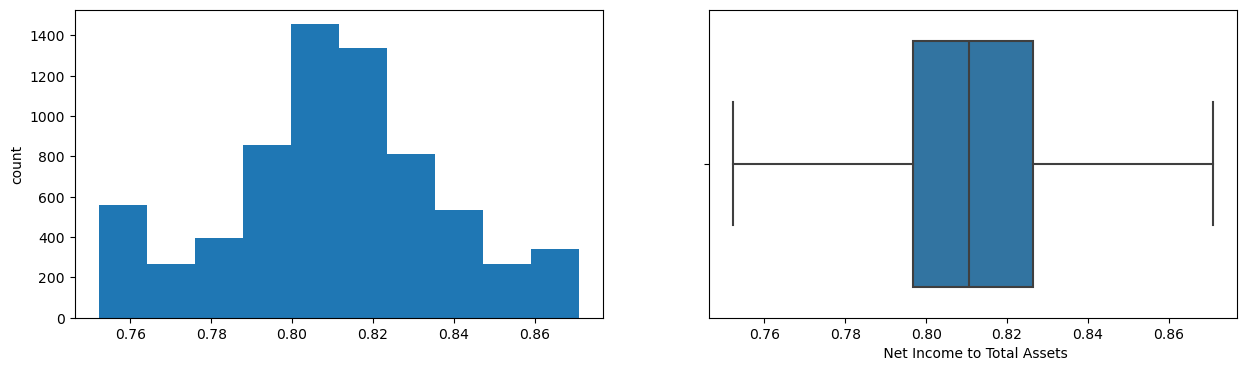

 Total assets to GNP price
Skew : 1.16


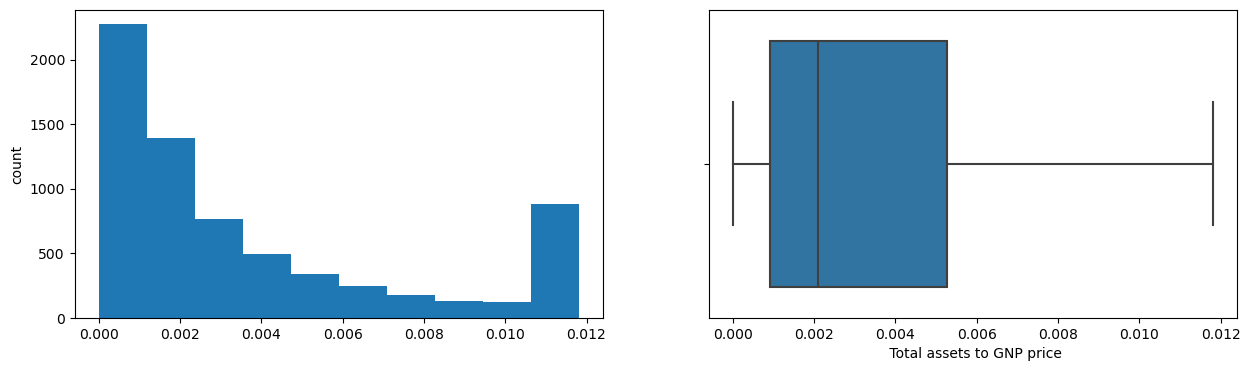

 No-credit Interval
Skew : -0.01


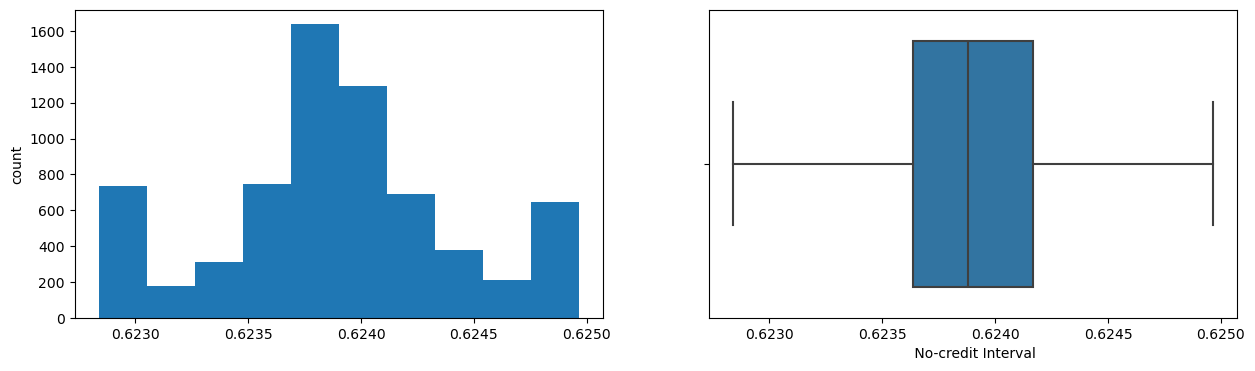

 Gross Profit to Sales
Skew : 0.54


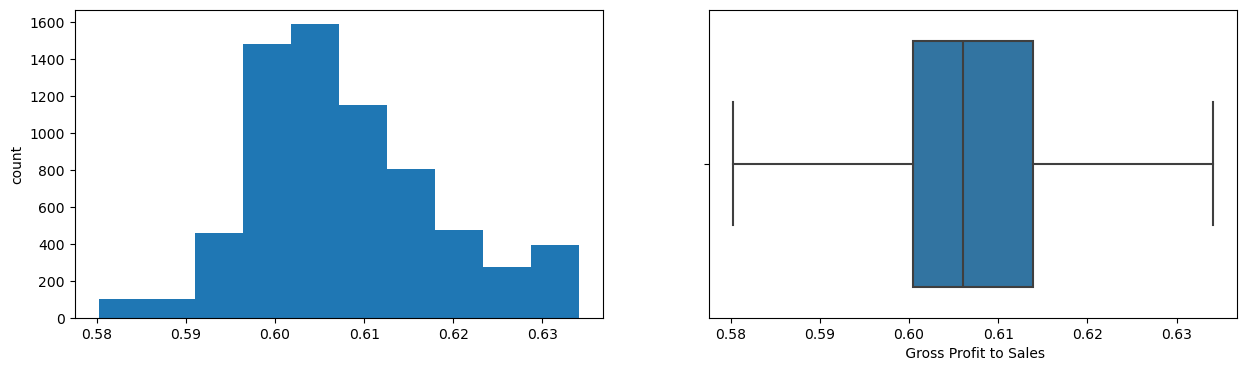

 Net Income to Stockholder's Equity
Skew : -0.3


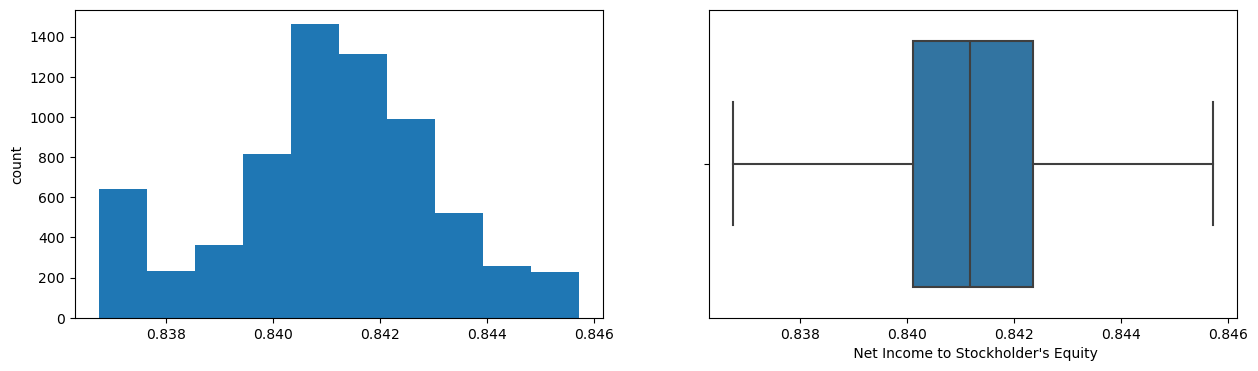

 Liability to Equity
Skew : 0.95


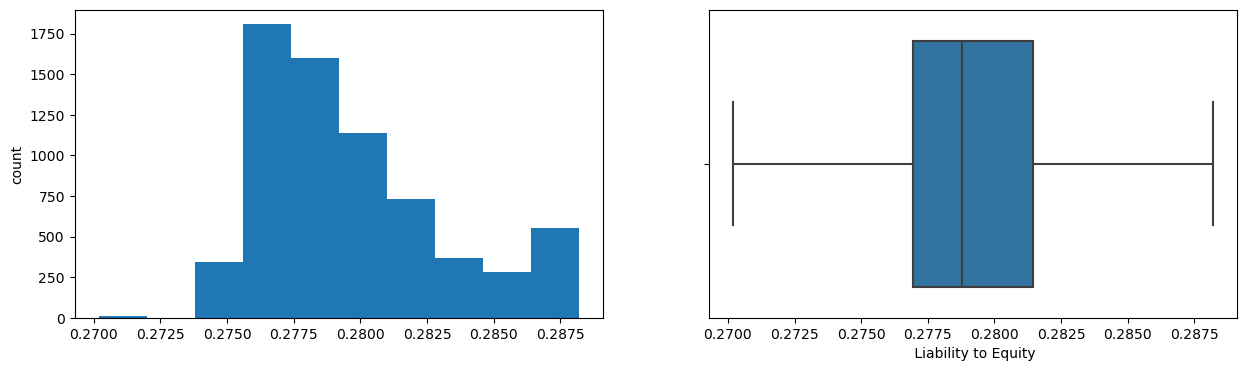

 Degree of Financial Leverage (DFL)
Skew : 0.4


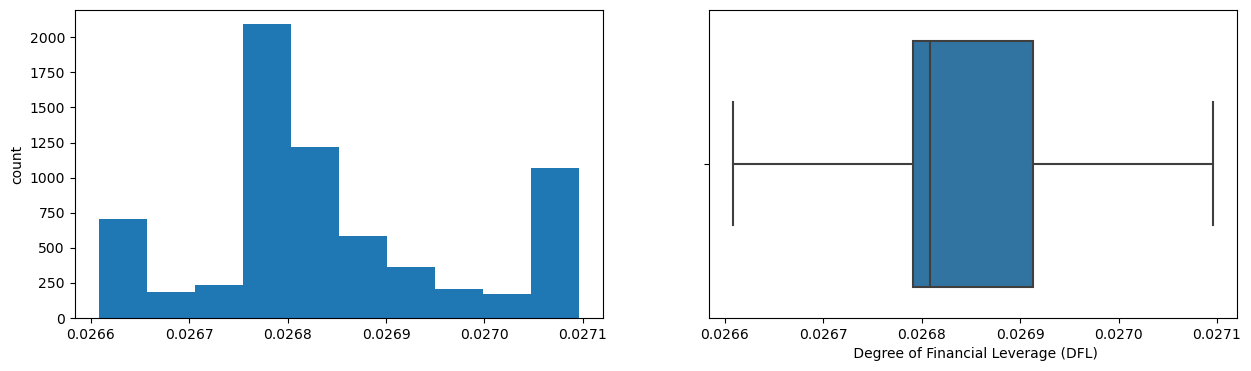

 Interest Coverage Ratio (Interest expense to EBIT)
Skew : 0.38


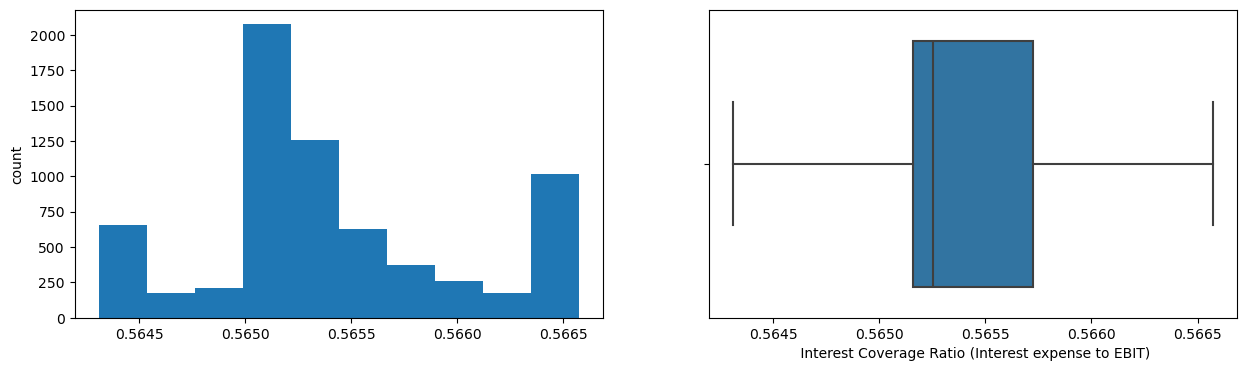

 Net Income Flag
Skew : 0.0


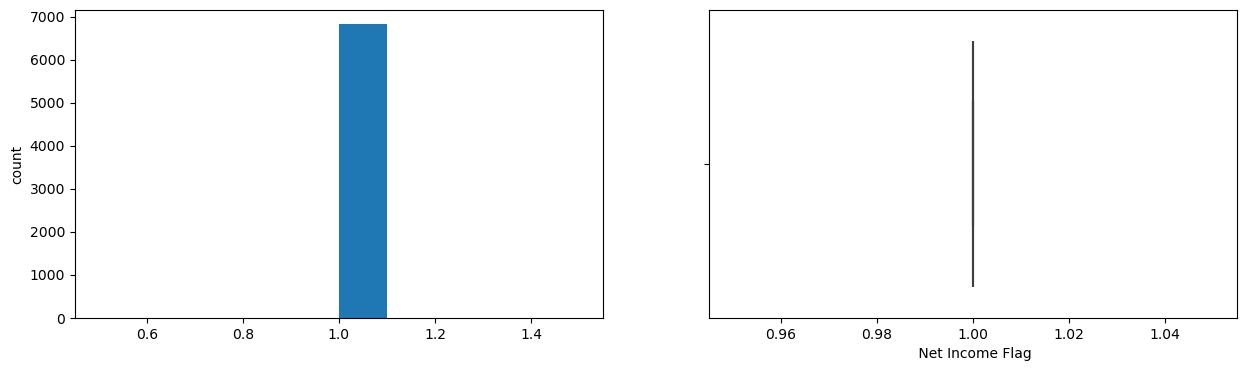

 Equity to Liability
Skew : 1.08


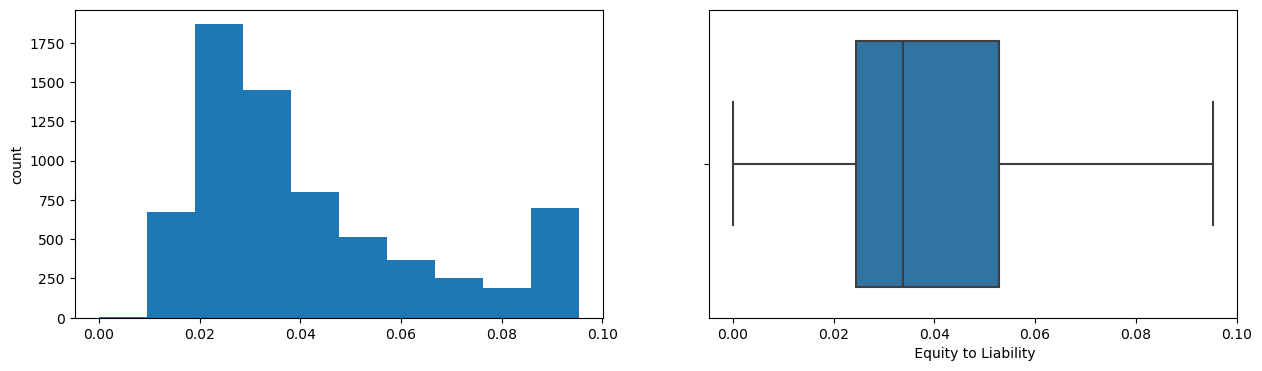

In [28]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

# Plotting the Correlation Using the Heatmap.

In [30]:
# Calculate the correlation matrix
corr = df.corr()
corr

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.239543   
 ROA(A) before interest and % after tax             -0.239500   
 ROA(B) before interest and depreciation after tax  -0.241993   
 Operating Gross Margin                             -0.140042   
...                                                       ...   
 Liability to Equity                                 0.246176   
 Degree of Financial Leverage (DFL)                 -0.129292   
 Interest Coverage Ratio (Interest expense to E...  -0.110761   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.161036   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.239543          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.941564          
 ROA(B) before interest and depreciation after tax                                           0.988614          
 Operating Gross Margin                                                                      0.471126          
...                                                                                               ...          
 Liability to Equity                                                                        -0.258969          
 Degree of Financial Leverage (DFL)                                                          0.111443          
 Interest Coverage Ratio (Interest expense to E...                                           0.099427          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.185974          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.239500   
 ROA(C) before interest and depreciation before...                                 0.941564   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.952666   
 Operating Gross Margin                                                            0.471641   
...                                                                                     ...   
 Liability to Equity                                                              -0.254115   
 Degree of Financial Leverage (DFL)                                                0.153120   
 Interest Coverage Ratio (Interest expense to E...                                 0.140903   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.186650   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.241993    
 ROA(C) before interest and depreciation before...                                           0.988614    
 ROA(A) before interest and % after tax                                                      0.952666    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.481338    
...                                                                                               ...    
 Liability to Equity                       

In [31]:
# Calculate the correlation matrix
corr = df.corr()
# Create a wider heatmap without labels
plt.figure(figsize=(100, 100), dpi=130)  # Adjust width (12) and height (6) as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.show()

C:\Users\yashw\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [33]:
y = df['Bankrupt?']
X = df.drop('Bankrupt?', axis=1)

In [34]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X, y = over.fit_resample(X, y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=97, test_size=0.2)

In [36]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(10558, 95) (10558,)
(2640, 95) (2640,)


In [37]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)

In [38]:
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(X_train_sc, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [39]:
sel_.get_support()

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True])

In [40]:
sel_.estimator_.coef_

array([[-5.28439061,  0.        ,  5.48654965,  0.        ,  0.07707186,
        -0.77884454,  1.8928747 , -0.17997009,  0.07594895, -0.83905098,
         0.11724009,  0.0849861 , -0.48814764,  0.62660062,  0.14390378,
        -2.5252421 ,  0.45794661,  2.239359  , -3.340425  ,  0.19210352,
        -1.10291938,  0.        ,  0.86386052,  0.04659871,  0.2535752 ,
        -0.06381976,  0.21119186, -0.35999684, -0.05085969, -0.4691874 ,
         0.214563  , -0.51819879,  0.46086467, -1.44227387, -0.42959708,
         2.41848585, -0.29892228,  0.        ,  0.16010219,  0.73976482,
         0.02488758,  0.75765982,  0.44193137, -0.84096842, -0.1860954 ,
        -0.47891985,  0.34042002,  0.11975972,  0.02359873,  0.92828851,
         0.36143587,  0.74168879,  0.58102796,  0.7534143 , -0.19186296,
         0.        , -0.02957397,  1.12962444,  0.12384295, -0.4725857 ,
         0.31257405,  0.03888058, -0.17426471,  0.35206608, -0.04966909,
         0.03560768, -0.33741519,  0.3281887 , -0.2

In [41]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 95
selected features: 85
features with coefficients shrank to zero: 10


In [42]:
np.sum(sel_.estimator_.coef_ == 0)

10

In [43]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats = removed_feats.to_list()

In [44]:
X_train_sc.drop(removed_feats, axis=1, inplace=True)

In [45]:
X_train_sc.shape, y_train.shape

((10558, 85), (10558,))

In [46]:
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns, index=X_test.index)
X_test_sc.drop(removed_feats, axis=1, inplace=True)

In [47]:
X_test_sc.shape, y_test.shape

((2640, 85), (2640,))

In [48]:
from sklearn.decomposition import PCA

In [49]:
pc = PCA(n_components=len(X_train_sc.columns))
X_train_pc=pc.fit_transform(X_train_sc)
PC_df_train=pd.DataFrame(X_train_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])

In [50]:
PC_df_train

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0      -5.690695  1.105337  1.616706  0.270353 -1.400283 -0.571061 -1.400319   
1      -0.476350 -3.922470 -2.714658  3.523323 -0.013631  2.934339  0.402326   
2      10.508105  3.658337 -1.611141 -3.548050  1.800187  0.317198 -1.524442   
3      -3.106275  1.227258 -1.943443 -4.135495 -0.774771 -1.408293  1.907778   
4       9.233707  0.549800 -2.408348 -2.830765 -0.365466 -1.821316 -2.570107   
...          ...       ...       ...       ...       ...       ...       ...   
10553  -6.481876  0.578434  3.381566 -3.441404 -0.258852 -0.626671 -1.508633   
10554  -6.097233 -0.137769  3.203083 -0.237965 -2.339687  0.622835 -0.899668   
10555  -7.178979 -0.220684 -3.332341 -1.274584 -0.058326  0.322262  1.748869   
10556  -4.993170  4.766852 -3.583716  3.403400  0.231923 -1.033286  0.724394   
10557  -2.720751  0.377211  4.097708  0.132380  3.501228  0.500378 -0.838949   

           PC_8      PC_9     PC_10  ...     PC_76     PC_77     PC_78  \
0     -0.906282 -1.300837  0.106845  ...  0.093089 -0.070774  0.001617   
1      0.196385  1.782856 -0.894422  ...  0.157197  0.030323  0.122996   
2     -1.137913  0.098752 -0.649947  ... -0.107777  0.158032 -0.030329   
3      0.380662  3.056086 -1.154156  ...  0.247874 -0.016839  0.061296   
4     -2.262038 -0.231083 -0.285002  ... -0.034381 -0.000367 -0.066691   
...         ...       ...       ...  ...       ...       ...       ...   
10553  0.064354  1.563414 -1.234770  ...  0.106554 -0.143567  0.021578   
10554 -0.431893 -0.666211  0.372901  ...  0.118184 -0.077879 -0.014855   
10555  1.122970 -0.256661 -0.667625  ...  0.089596 -0.022193 -0.035442   
10556  1.543591 -0.348354  0.439227  ...  0.047076  0.008429  0.048715   
10557  1.778939 -0.455016  1.417748  ...  0.043420  0.022701  0.029571   

          PC_79     PC_80     PC_81     PC_82     PC_83         PC_84  \
0      0.024745 -0.022658  0.041504  0.001904  0.002071  4.287614e-17   
1     -0.000865 -0.058626  0.021259  0.000631  0.001511  2.335285e-16   
2     -0.025392  0.000377  0.025823 -0.005252 -0.001388  1.894898e-16   
3     -0.026033  0.031550 -0.003921  0.042149  0.005829 -5.131259e-18   
4      0.041160 -0.002067  0.022571 -0.016521 -0.001223 -1.663416e-17   
...         ...       ...       ...       ...       ...           ...   
10553 -0.021924 -0.008696  0.022937 -0.007634  0.003071 -2.381013e-17   
10554  0.027898 -0.004170  0.063179  0.010635  0.005355 -2.558469e-17   
10555 -0.019926  0.054669  0.035731 -0.016178  0.001245  6.288615e-18   
10556  0.006966 -0.041808  0.003442  0.002500 -0.002477  4.636705e-17   
10557  0.015230 -0.007539 -0.001561 -0.021153 -0.003462 -1.257774e-16   

              PC_85  
0      6.766764e-16  
1     -1.715273e-16  
2      8.983101e-16  
3     -1.267668e-15  
4     -6.014336e-16  
...             ...  
10553  2.268244e-16  
10554 -7.102807e-17  
10555  4.185427e-17  
10556  1.176027e-16  
10557  5.925190e-17  

[10558 rows x 85 columns]

In [51]:
import matplotlib.pyplot as plt

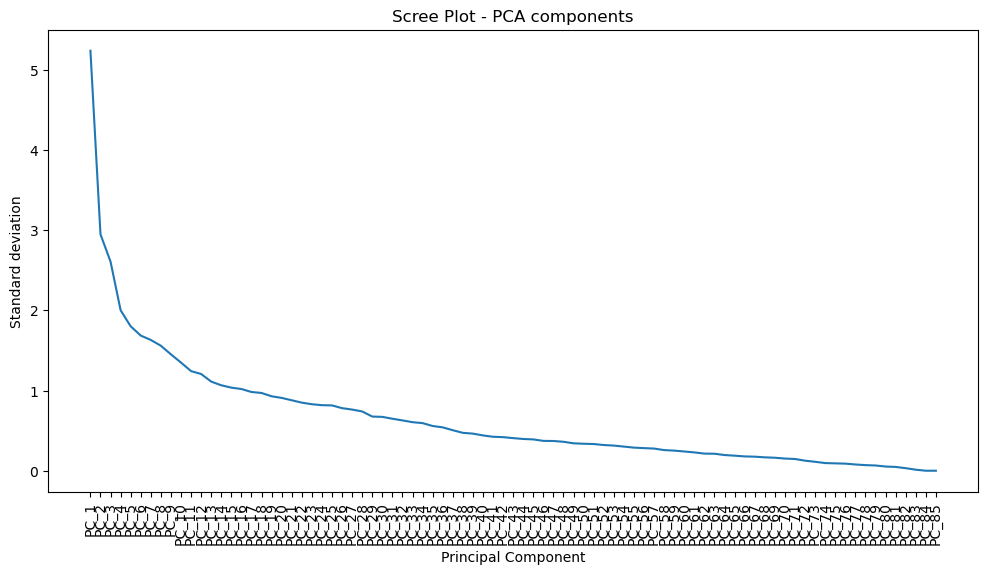

In [52]:
plt.figure(figsize=(12,6))
plt.plot(PC_df_train.std())
plt.title('Scree Plot - PCA components')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.ylabel('Standard deviation')
plt.show()

In [53]:
pc = PCA(n_components=15)
X_train_pc=pc.fit_transform(X_train_sc)
PC_df_train=pd.DataFrame(X_train_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])

In [54]:
X_test_pc = pc.transform(X_test_sc)
PC_df_test=pd.DataFrame(X_test_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])

In [55]:
print(PC_df_train.shape)
y_train.shape

(10558, 15)


(10558,)

In [56]:
classifier = LogisticRegression()
classifier.fit(PC_df_train,y_train)
y_lr=classifier.predict(X_test_pc)

C:\Users\yashw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
print('Confusion Matrix \n',confusion_matrix(y_lr,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_lr,y_test))
print()
print('Classification Report \n',classification_report(y_lr,y_test))

Confusion Matrix 
 [[1145  132]
 [ 174 1189]]

Accuracy Score 
 0.884090909090909

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1277
           1       0.90      0.87      0.89      1363

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



In [58]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [59]:
classifier = SVC()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
y_svc=classifier.predict(X_test_pc)

print('Confusion Matrix \n',confusion_matrix(y_svc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svc,y_test))
print()
print('Classification Report \n',classification_report(y_svc,y_test))

Confusion Matrix 
 [[1221   16]
 [  98 1305]]

Accuracy Score 
 0.9568181818181818

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1237
           1       0.99      0.93      0.96      1403

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



In [60]:
classifier = RandomForestClassifier()
classifier.fit(X_train_pc,y_train)
y_rfc=classifier.predict(X_test_pc)

print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))

Confusion Matrix 
 [[1250   15]
 [  69 1306]]

Accuracy Score 
 0.9681818181818181

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.99      0.95      0.97      1375

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train_pc,y_train)
y_gbc=classifier.predict(X_test_pc)

print('Confusion Matrix \n',confusion_matrix(y_gbc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gbc,y_test))
print()
print('Classification Report \n',classification_report(y_gbc,y_test))

Confusion Matrix 
 [[1180   36]
 [ 139 1285]]

Accuracy Score 
 0.9337121212121212

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1216
           1       0.97      0.90      0.94      1424

    accuracy                           0.93      2640
   macro avg       0.93      0.94      0.93      2640
weighted avg       0.94      0.93      0.93      2640



In [63]:
classifier = GaussianNB()
classifier.fit(X_train_pc,y_train)
y_gb=classifier.predict(X_test_pc)

print('Confusion Matrix \n',confusion_matrix(y_gb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gb,y_test))
print()
print('Classification Report \n',classification_report(y_gb,y_test))

Confusion Matrix 
 [[1167  162]
 [ 152 1159]]

Accuracy Score 
 0.8810606060606061

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1329
           1       0.88      0.88      0.88      1311

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



In [64]:
classifier = XGBClassifier()
classifier.fit(X_train_pc, y_train)
y_xg=classifier.predict(X_test_pc)

print('Confusion Matrix \n',confusion_matrix(y_xg,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_xg,y_test))
print()
print('Classification Report \n',classification_report(y_xg,y_test))

Confusion Matrix 
 [[1261    6]
 [  58 1315]]

Accuracy Score 
 0.9757575757575757

Classification Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1267
           1       1.00      0.96      0.98      1373

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



In [65]:
import matplotlib
import seaborn as sns

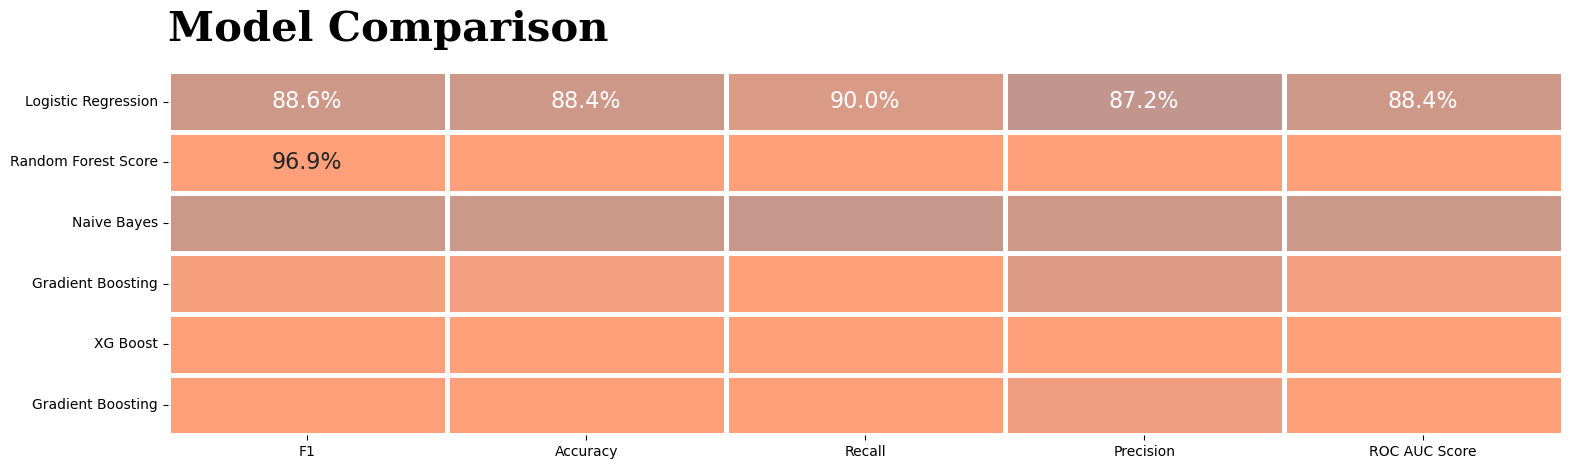

In [66]:
lr_df = pd.DataFrame(data=[f1_score(y_test,y_lr),accuracy_score(y_test, y_lr), recall_score(y_test, y_lr), precision_score(y_test, y_lr), roc_auc_score(y_test, y_lr)], 
             columns=['Logistic Regression'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
rf_df = pd.DataFrame(data=[f1_score(y_test,y_rfc),accuracy_score(y_test, y_rfc), recall_score(y_test, y_rfc),precision_score(y_test, y_rfc), roc_auc_score(y_test, y_rfc)], 
             columns=['Random Forest Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
nb_df = pd.DataFrame(data=[f1_score(y_test,y_gb),accuracy_score(y_test, y_gb), recall_score(y_test, y_gb), precision_score(y_test, y_gb), roc_auc_score(y_test, y_gb)], 
             columns=['Naive Bayes'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xg_df = pd.DataFrame(data=[f1_score(y_test,y_xg),accuracy_score(y_test, y_xg), recall_score(y_test, y_xg), precision_score(y_test, y_xg), roc_auc_score(y_test, y_xg)], 
             columns=['XG Boost'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
gbc_df = pd.DataFrame(data=[f1_score(y_test,y_gbc),accuracy_score(y_test, y_gbc), recall_score(y_test, y_gbc), precision_score(y_test, y_gbc), roc_auc_score(y_test,y_gbc)], 
             columns=['Gradient Boosting'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
svc_df = pd.DataFrame(data=[f1_score(y_test,y_svc),accuracy_score(y_test, y_svc), recall_score(y_test, y_svc), precision_score(y_test, y_svc), roc_auc_score(y_test,y_svc)], 
             columns=['Gradient Boosting'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


df_models = round(pd.concat([lr_df,rf_df,nb_df,gbc_df,xg_df,svc_df], axis=1),3)
colors = ["bisque","ivory","sandybrown","steelblue","lightsalmon"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(18,26)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=30,fontweight='bold',fontfamily='serif')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Assuming features and target are predefined dataframes or arrays
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the best model (e.g., Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
best_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

# If needed, use cross-validation for a more robust performance estimate
cv_scores = cross_val_score(best_model, features, target.values.ravel(), cv=5, scoring='roc_auc')
print(f"Cross-validated ROC AUC: {cv_scores.mean()}")


Accuracy: 0.967741935483871
F1 Score: 0.2903225806451613
Precision: 0.8181818181818182
Recall: 0.17647058823529413
ROC AUC Score: 0.5874736794946462
Cross-validated ROC AUC: 0.9050075266762324


In [68]:
import joblib

# Save the best model (assuming RandomForestClassifier was the best)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train.values.ravel())

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [69]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X_train is your training data
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')
scaler = joblib.load('scaler.pkl')
